# JEM092 Asset Pricing - Homework 1

<span style='background:yellow'> **Group : 20107894**</span>

Team Member:

Yanqi Guan : 20107894@fsv.cuni.cz

Lin Zhang : 15845542@fsv.cuni.cz

Jiayi Zeng : 46566215@fsv.cuni.cz


### Task 1 - Data download 
In the previous step, you were assigned firms for which you will get the data. You will download 
* daily adjusted close price and volume data from www.finance.yahoo.com
* Market Capitalization and Book Value per Share data from www.macrotrends.net
* Sample period: 01.01.2007 - 28.02.2022 

***

* <span style='background: lightblue'>**First, we setup environment and relative libraries**</span>

In [2]:
# Setup environment
Sys.setenv(LANG = "en")
Sys.setlocale("LC_TIME", "English")
options(warn = -1)  # suppressing warnings


if (!require(quantmod)) install.packages('quantmod')
if (!require(httr)) install.packages('httr')
if (!require(rvest)) install.packages('rvest')
if (!require(jsonlite)) install.packages('jsonlite')
if (!require(treasuryTR)) install.packages('treasuryTR')
if (!require(xts)) install.packages('xts')
if (!require(PortfolioAnalytics)) install.packages('PortfolioAnalytics')
if (!require(ROI)) install.packages('ROI')
if (!require(ggplot2)) install.packages('ggplot2')
if (!require(ggthemes)) install.packages('ggthemes')
if (!require(timetk)) install.packages('timetk')
if (!require(dplyr)) install.packages('dplyr')

library(quantmod)
library(httr)
library(rvest)
library(jsonlite)
library(treasuryTR)
library(xts)
library(PortfolioAnalytics)
library(ROI)
library(ggplot2)
library(ggthemes)
library(timetk)
library(dplyr)

options(repr.plot.width = 10, repr.plot.height = 6)

[1] "English_United States.1252"

### <span style='background: lightblue'>(1). Load stock symbols from file</span>

In [2]:
# read symbols from file
smbs <- read.csv('20107894_rand_download.csv',colClasses = "character")
head(smbs,3)
p_symbols <- smbs[[2]]
p_symbols

,X,x
,<chr>,<chr>
1,1,ABT
2,2,CMS
3,3,PNR


[1] "ABT"  "CMS"  "PNR"  "AVB"  "IEX"  "SBAC" "QCOM" "BWA"  "WMB"  "DRI" 
[11] "WBA"  "VLO"  "CAT"  "NRG"  "MCK"  "STZ"  "ZBRA" "MHK"  "LRCX" "YUM"

### <span style='background: lightblue'>(2). Download Stock Price Data</span>

* Apply quantmod library to download trading data from yahoo and save into a xts list: **OHLCV**

In [3]:
# Download closing price and volume data into list named OHLCV
OHLCV <- lapply(p_symbols, function(y)
{
    try(getSymbols(y, auto.assign = FALSE,from = as.Date('2007-01-01'), to = '2022-03-01'),silent=TRUE)
})

#Assign symbols name
names(OHLCV) <- p_symbols

# check the symbol names and counts
attributes(OHLCV)$names
length(OHLCV)

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




[1] "ABT"  "CMS"  "PNR"  "AVB"  "IEX"  "SBAC" "QCOM" "BWA"  "WMB"  "DRI" 
[11] "WBA"  "VLO"  "CAT"  "NRG"  "MCK"  "STZ"  "ZBRA" "MHK"  "LRCX" "YUM"

[1] 20

* Verify data format and date range

In [4]:
# check data date range
lapply(OHLCV, head, 3)[1:2]
lapply(OHLCV, tail, 3)[1:2]

$ABT
           ABT.Open ABT.High  ABT.Low ABT.Close ABT.Volume ABT.Adjusted
2007-01-03 23.42863 23.74530 23.39025  23.49581   11214881     13.37988
2007-01-04 23.53899 24.10515 23.49581  23.94202   21185494     13.63399
2007-01-05 23.94202 23.99000 23.63975  23.94202   14649854     13.63399

$CMS
           CMS.Open CMS.High CMS.Low CMS.Close CMS.Volume CMS.Adjusted
2007-01-03    16.76    16.86   16.65     16.81    2915800     10.32142
2007-01-04    16.76    16.88   16.66     16.74    1271100     10.27844
2007-01-05    16.65    16.69   16.42     16.47    3123700     10.11266


$ABT
           ABT.Open ABT.High ABT.Low ABT.Close ABT.Volume ABT.Adjusted
2022-02-24   115.00   118.92  114.43    118.72    6252600       118.72
2022-02-25   118.72   122.93  118.50    122.41    5837700       122.41
2022-02-28   121.05   121.06  119.15    120.62    6827300       120.62

$CMS
           CMS.Open CMS.High CMS.Low CMS.Close CMS.Volume CMS.Adjusted
2022-02-24    61.73    62.15   61.16     61.97    2140300        61.97
2022-02-25    62.65    64.43   62.39     64.14    2660000        64.14
2022-02-28    63.56    64.23   63.30     64.01    2817500        64.01


### <span style='background: lightblue'>(3). Download Book Value Data</span>

In [5]:
# Setup global parameters
m_website <- "https://www.macrotrends.net/stocks/charts/"
m_pb <- "price-book"
m_website
m_pb

[1] "https://www.macrotrends.net/stocks/charts/"

[1] "price-book"

* Searching for company names by symbol for download link

In [6]:
#  Searching for company names, create webpage link from symbols
getLink <- function(symb){    
    r1 <- GET(paste0(m_website, symb))
    return (paste0(r1[[1]] , m_pb))
}

# Call the function and output updated links
links <- lapply(p_symbols, getLink)
links

[[1]]
[1] "https://www.macrotrends.net/stocks/charts/ABT/abbott-laboratories/price-book"

[[2]]
[1] "https://www.macrotrends.net/stocks/charts/CMS/cms-energy/price-book"

[[3]]
[1] "https://www.macrotrends.net/stocks/charts/PNR/pentair/price-book"

[[4]]
[1] "https://www.macrotrends.net/stocks/charts/AVB/avalonbay-communities/price-book"

[[5]]
[1] "https://www.macrotrends.net/stocks/charts/IEX/idex/price-book"

[[6]]
[1] "https://www.macrotrends.net/stocks/charts/SBAC/sba-communications/price-book"

[[7]]
[1] "https://www.macrotrends.net/stocks/charts/QCOM/qualcomm/price-book"

[[8]]
[1] "https://www.macrotrends.net/stocks/charts/BWA/borgwarner/price-book"

[[9]]
[1] "https://www.macrotrends.net/stocks/charts/WMB/williams/price-book"

[[10]]
[1] "https://www.macrotrends.net/stocks/charts/DRI/darden-restaurants/price-book"

[[11]]
[1] "https://www.macrotrends.net/stocks/charts/WBA/walgreens/price-book"

[[12]]
[1] "https://www.macrotrends.net/stocks/charts/VLO/valero-energy/price-book"

[[13]]
[1] "https://www.macrotrends.net/stocks/charts/CAT/caterpillar/price-book"

[[14]]
[1] "https://www.macrotrends.net/stocks/charts/NRG/nrg-energy/price-book"

[[15]]
[1] "https://www.macrotrends.net/stocks/charts/MCK/mckesson/price-book"

[[16]]
[1] "https://www.macrotrends.net/stocks/charts/STZ/constellation-brands-inc/price-book"

[[17]]
[1] "https://www.macrotrends.net/stocks/charts/ZBRA/zebra-technologies/price-book"

[[18]]
[1] "https://www.macrotrends.net/stocks/charts/MHK/mohawk-industries/price-book"

[[19]]
[1] "https://www.macrotrends.net/stocks/charts/LRCX/lam-research/price-book"

[[20]]
[1] "https://www.macrotrends.net/stocks/charts/YUM/yum!-brands/price-book"

* Apply treasuryTR library to download PB data from html_table, and save data into a xts list: **book_value**

In [7]:
# Download PB data from website, and put data into xts list named "book_value"
# This process may run a while ...

# Create download data function
getPB <- function(symbol_in){   
    
    # Get the links
    r1 <- GET(paste0(m_website, symbol_in))
    link_in <- (paste0(r1[[1]] , m_pb))       
    
    # Read HTML data from webpage
    t_table <- read_html(link_in) %>% 
        html_table(header = TRUE, fill = TRUE ) %>% 
            .[[1]]    
    
    # Rename table columns
    colnames(t_table) <- c("date", "Stock Price", paste0(symbol_in,".Book Value per Share"),
                            "Price/Book Ratio")    
    # Clean data format
    t_table <- t_table[-1,] # Remove first row column names
    t_table[[1]] <- as.Date(t_table[[1]]) # Format date
    t_table[[2]] <- as.numeric(t_table[[2]]) # Format Stock Price
    t_table[[3]] <- as.numeric(gsub("[$,]","",t_table[[3]])) # Format Book Value
    t_table[[4]] <- as.numeric(t_table[[4]]) # Format PB
    
    # Put html_table into xts format
    t_xts <- tibble_to_xts(t_table)

    # Put xts object into global list
    book_value[[symbol_in]] <<- t_xts 
    
    return (paste0(symbol_in , ":  Book Value data is downloaded successfully !"))
}

# Create a xts list for book value data
book_value <- list()

# call getPB function for 20 symbols
lapply(p_symbols, getPB)


[[1]]
[1] "ABT:  Book Value data is downloaded successfully !"

[[2]]
[1] "CMS:  Book Value data is downloaded successfully !"

[[3]]
[1] "PNR:  Book Value data is downloaded successfully !"

[[4]]
[1] "AVB:  Book Value data is downloaded successfully !"

[[5]]
[1] "IEX:  Book Value data is downloaded successfully !"

[[6]]
[1] "SBAC:  Book Value data is downloaded successfully !"

[[7]]
[1] "QCOM:  Book Value data is downloaded successfully !"

[[8]]
[1] "BWA:  Book Value data is downloaded successfully !"

[[9]]
[1] "WMB:  Book Value data is downloaded successfully !"

[[10]]
[1] "DRI:  Book Value data is downloaded successfully !"

[[11]]
[1] "WBA:  Book Value data is downloaded successfully !"

[[12]]
[1] "VLO:  Book Value data is downloaded successfully !"

[[13]]
[1] "CAT:  Book Value data is downloaded successfully !"

[[14]]
[1] "NRG:  Book Value data is downloaded successfully !"

[[15]]
[1] "MCK:  Book Value data is downloaded successfully !"

[[16]]
[1] "STZ:  Book Value data is downloaded successfully !"

[[17]]
[1] "ZBRA:  Book Value data is downloaded successfully !"

[[18]]
[1] "MHK:  Book Value data is downloaded successfully !"

[[19]]
[1] "LRCX:  Book Value data is downloaded successfully !"

[[20]]
[1] "YUM:  Book Value data is downloaded successfully !"

* Verify data format and date range

In [8]:
# Save data into file if necessary
# save(book_value, file = "2-PB.RData")
# load("2-PB.RData")

# check the data, symbol names and counts
length(book_value)
attributes(book_value)$names

# check data date range
lapply(book_value, head, 3)[1:2]
lapply(book_value, tail, 3)[1:2]

[1] 20

[1] "ABT"  "CMS"  "PNR"  "AVB"  "IEX"  "SBAC" "QCOM" "BWA"  "WMB"  "DRI" 
[11] "WBA"  "VLO"  "CAT"  "NRG"  "MCK"  "STZ"  "ZBRA" "MHK"  "LRCX" "YUM"

$ABT
           Stock Price ABT.Book Value per Share Price/Book Ratio
2009-03-31       18.08                    11.64             1.55
2009-06-30       17.90                    12.89             1.39
2009-09-30       18.91                    13.82             1.37

$CMS
           Stock Price CMS.Book Value per Share Price/Book Ratio
2009-03-31        7.64                    11.33             0.67
2009-06-30        7.87                    11.60             0.68
2009-09-30        8.82                    11.81             0.75


$ABT
           Stock Price ABT.Book Value per Share Price/Book Ratio
2021-06-30      114.63                    19.19             5.97
2021-09-30      117.25                    19.59             5.99
2022-04-05      119.48                       NA             6.10

$CMS
           Stock Price CMS.Book Value per Share Price/Book Ratio
2021-09-30       58.87                    22.97             2.56
2021-12-31       64.57                    24.80             2.60
2022-04-05       71.11                       NA             2.87


### <span style='background: lightblue'>(4). Download Market Cap Data</span>

In [9]:
# Setup global parameters
mc_website <- "https://www.macrotrends.net/assets/php/market_cap.php?t="
mc_website
# Create a xts list for book value data
MktCap <- list()

[1] "https://www.macrotrends.net/assets/php/market_cap.php?t="

* Apply jsonlite library to download Market Cap data from html, and put data into a xts list named: **MktCap**

In [10]:
# Download Market Cap data from website, and put data into xts list named "MktCap"
# This process may run a while ...

# Create download data function
getMC <- function(symbol_in){   
    
    # Get the links     
    link_in <- paste0(mc_website, symbol_in)
    
    print(link_in)
    # Read HTML data from webpage
    m_node <- read_html(link_in) %>% 
        html_node('body') %>%
            html_children() %>%  
                html_text() 
    
    # Parse html data
    s1 <- strsplit(m_node, split = "]")
    s2 <- strsplit(s1[[2]][1], split = "=")
    s3 <- paste0(s2[[1]][2], "]")

    # call jsonlite library, get data frame
    mc_j <- fromJSON(s3)    
    
    # Convert data frame to time series
    mc_xts <- xts(mc_j[,2], as.Date(mc_j$date))  
    colnames(mc_xts) <- paste0(symbol_in,".Market Cap")

    # Put xts object into global list
    MktCap[[symbol_in]] <<- mc_xts 
    
    return (paste0(symbol_in , ":  Market Cap data is downloaded successfully !"))
}

# call getPB function for 20 symbols
lapply(p_symbols, getMC)

[1] "https://www.macrotrends.net/assets/php/market_cap.php?t=ABT"
[1] "https://www.macrotrends.net/assets/php/market_cap.php?t=CMS"
[1] "https://www.macrotrends.net/assets/php/market_cap.php?t=PNR"
[1] "https://www.macrotrends.net/assets/php/market_cap.php?t=AVB"
[1] "https://www.macrotrends.net/assets/php/market_cap.php?t=IEX"
[1] "https://www.macrotrends.net/assets/php/market_cap.php?t=SBAC"
[1] "https://www.macrotrends.net/assets/php/market_cap.php?t=QCOM"
[1] "https://www.macrotrends.net/assets/php/market_cap.php?t=BWA"
[1] "https://www.macrotrends.net/assets/php/market_cap.php?t=WMB"
[1] "https://www.macrotrends.net/assets/php/market_cap.php?t=DRI"
[1] "https://www.macrotrends.net/assets/php/market_cap.php?t=WBA"
[1] "https://www.macrotrends.net/assets/php/market_cap.php?t=VLO"
[1] "https://www.macrotrends.net/assets/php/market_cap.php?t=CAT"
[1] "https://www.macrotrends.net/assets/php/market_cap.php?t=NRG"
[1] "https://www.macrotrends.net/assets/php/market_cap.php?t=MCK"
[1] "htt

[[1]]
[1] "ABT:  Market Cap data is downloaded successfully !"

[[2]]
[1] "CMS:  Market Cap data is downloaded successfully !"

[[3]]
[1] "PNR:  Market Cap data is downloaded successfully !"

[[4]]
[1] "AVB:  Market Cap data is downloaded successfully !"

[[5]]
[1] "IEX:  Market Cap data is downloaded successfully !"

[[6]]
[1] "SBAC:  Market Cap data is downloaded successfully !"

[[7]]
[1] "QCOM:  Market Cap data is downloaded successfully !"

[[8]]
[1] "BWA:  Market Cap data is downloaded successfully !"

[[9]]
[1] "WMB:  Market Cap data is downloaded successfully !"

[[10]]
[1] "DRI:  Market Cap data is downloaded successfully !"

[[11]]
[1] "WBA:  Market Cap data is downloaded successfully !"

[[12]]
[1] "VLO:  Market Cap data is downloaded successfully !"

[[13]]
[1] "CAT:  Market Cap data is downloaded successfully !"

[[14]]
[1] "NRG:  Market Cap data is downloaded successfully !"

[[15]]
[1] "MCK:  Market Cap data is downloaded successfully !"

[[16]]
[1] "STZ:  Market Cap data is downloaded successfully !"

[[17]]
[1] "ZBRA:  Market Cap data is downloaded successfully !"

[[18]]
[1] "MHK:  Market Cap data is downloaded successfully !"

[[19]]
[1] "LRCX:  Market Cap data is downloaded successfully !"

[[20]]
[1] "YUM:  Market Cap data is downloaded successfully !"

* Verify data format and check date range

In [11]:
# Save data into file if necessary
# save(MktCap, file = "3-MC.RData")
# load("3-MC.RData")

# check the data, symbol names and counts
length(MktCap)
attributes(MktCap)$names

# check data date range
lapply(MktCap, head, 3)[1:2]
lapply(MktCap, tail, 3)[1:2]

[1] 20

[1] "ABT"  "CMS"  "PNR"  "AVB"  "IEX"  "SBAC" "QCOM" "BWA"  "WMB"  "DRI" 
[11] "WBA"  "VLO"  "CAT"  "NRG"  "MCK"  "STZ"  "ZBRA" "MHK"  "LRCX" "YUM"

$ABT
           ABT.Market Cap
2009-04-01          72.18
2009-04-02          70.14
2009-04-03          68.19

$CMS
           CMS.Market Cap
2009-04-01           2.71
2009-04-02           2.75
2009-04-03           2.77


$ABT
           ABT.Market Cap
2022-04-01         210.42
2022-04-04         210.95
2022-04-05         212.02

$CMS
           CMS.Market Cap
2022-04-01          20.55
2022-04-04          20.40
2022-04-05          20.55


### <span style='background: lightblue'>(5). Verify data by Plot Observation</span>

* Check Stock price data

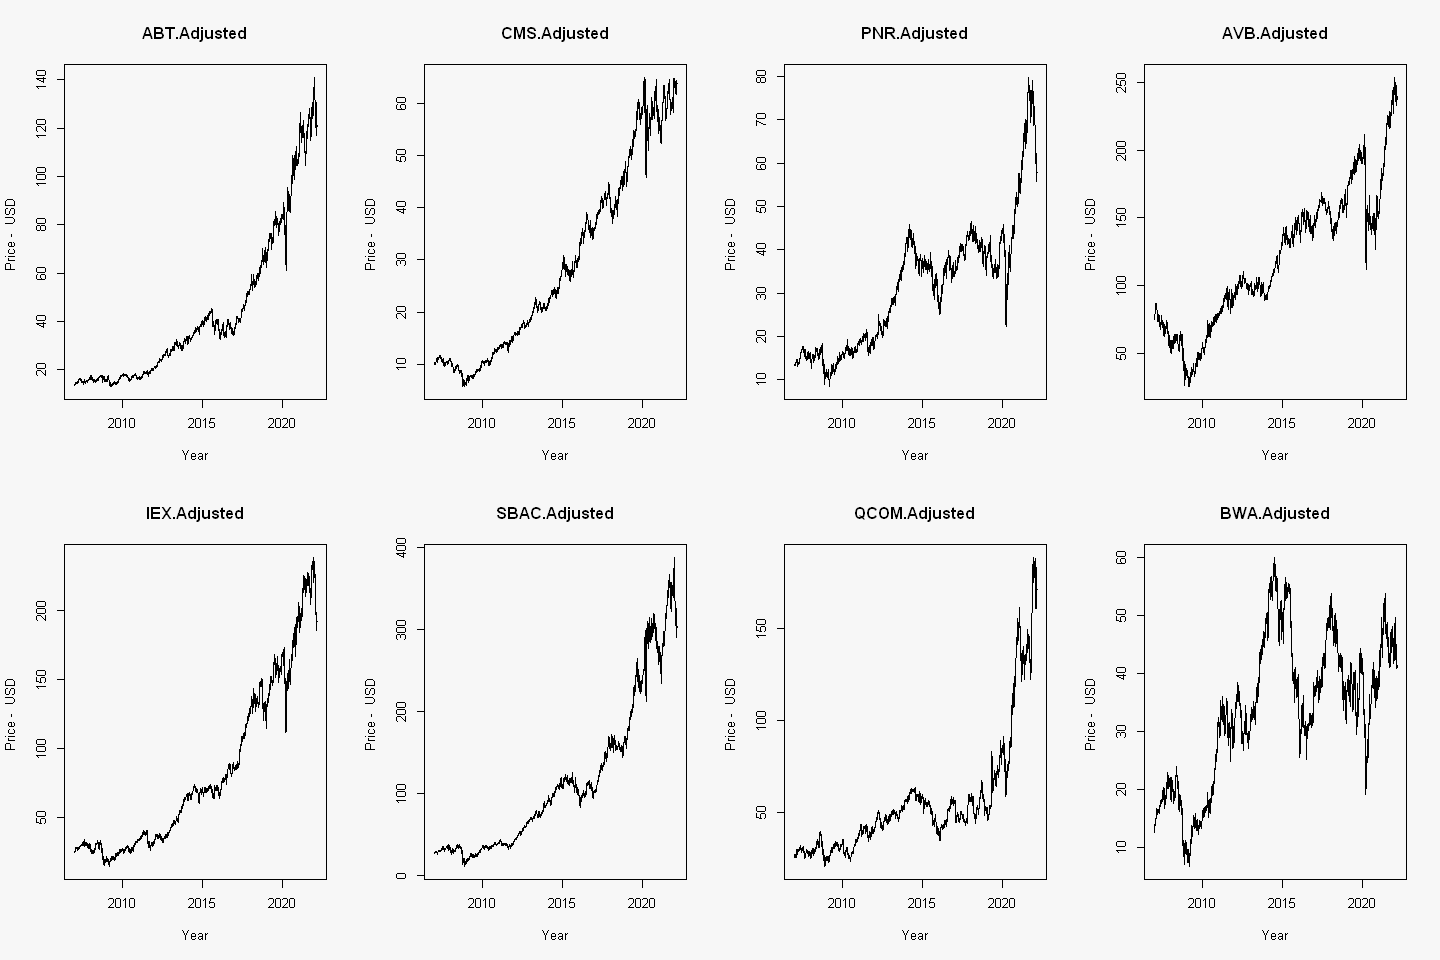

$ABT
NULL

$CMS
NULL

$PNR
NULL

$AVB
NULL

$IEX
NULL

$SBAC
NULL

$QCOM
NULL

$BWA
NULL

$WMB
NULL

$DRI
NULL

$WBA
NULL

$VLO
NULL

$CAT
NULL

$NRG
NULL

$MCK
NULL

$STZ
NULL

$ZBRA
NULL

$MHK
NULL

$LRCX
NULL

$YUM
NULL

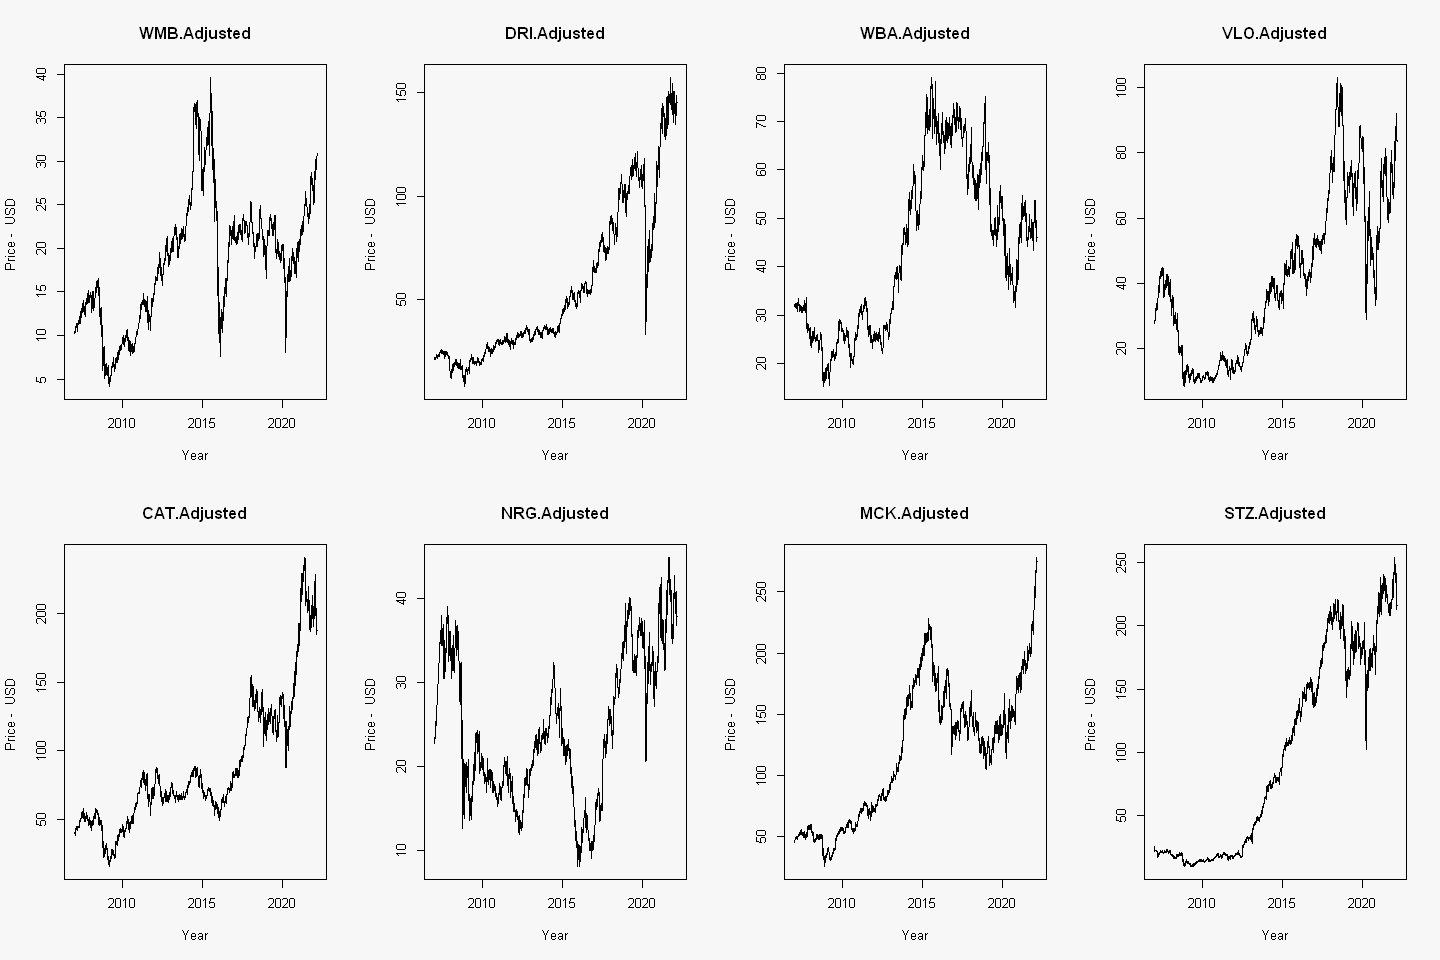

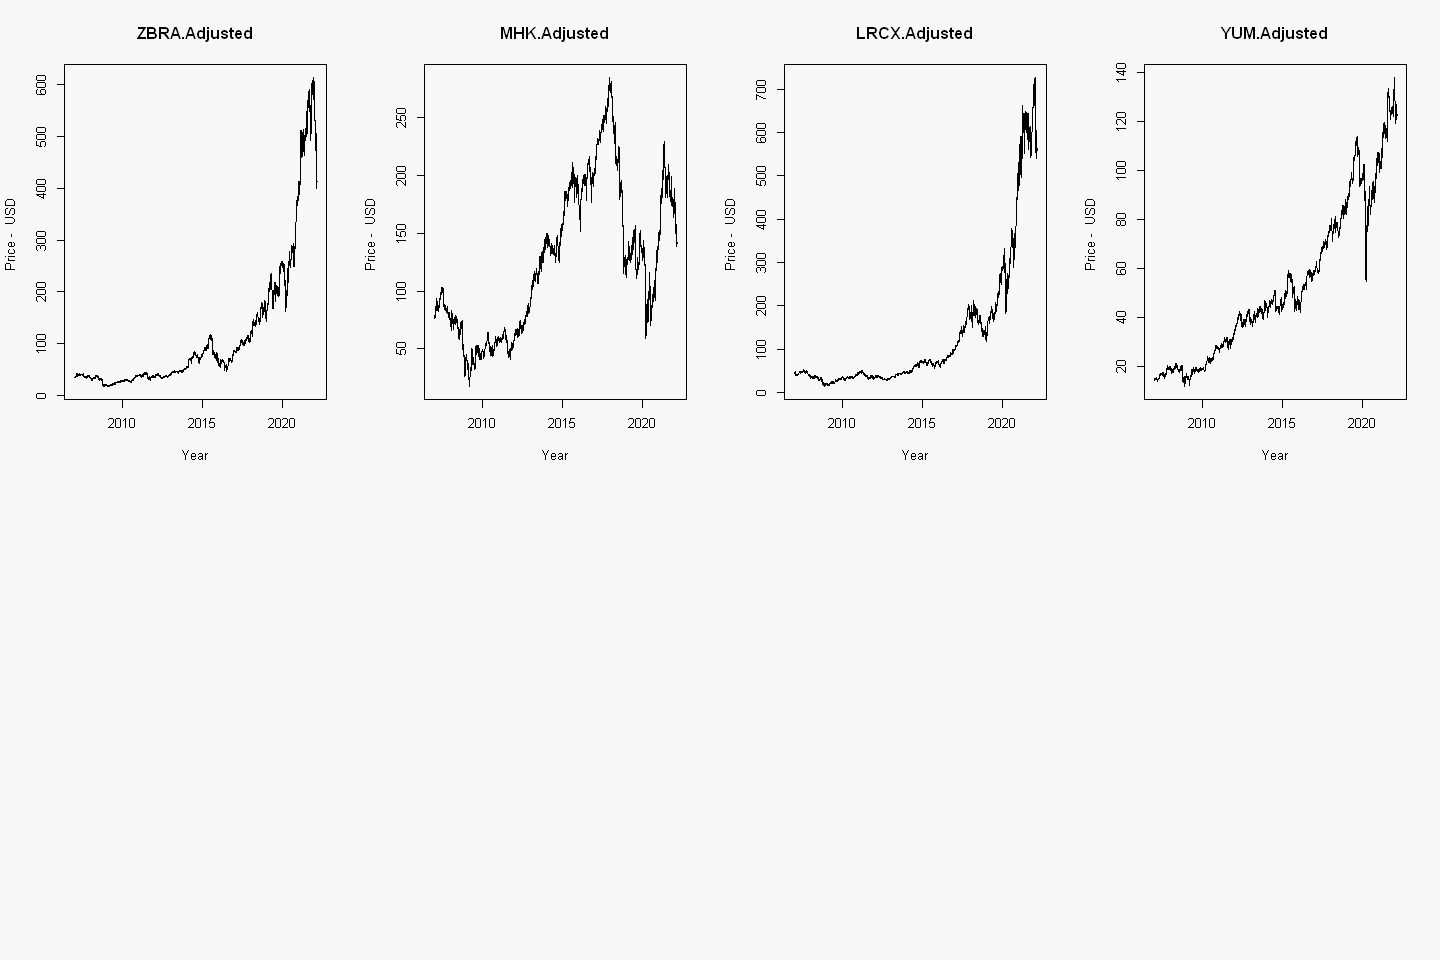

In [12]:
# Plot stock prices
par(bg = "#f7f7f7")
options(repr.plot.width = 12, repr.plot.height = 8)
par(mfrow = c(2, 4))
sapply(OHLCV, function(y){
    plot(index(y), y[,6], type = 'l', main= colnames(y)[6], xlab = 'Year',
     ylab = 'Price -  USD ')
})

* Check Book Value data

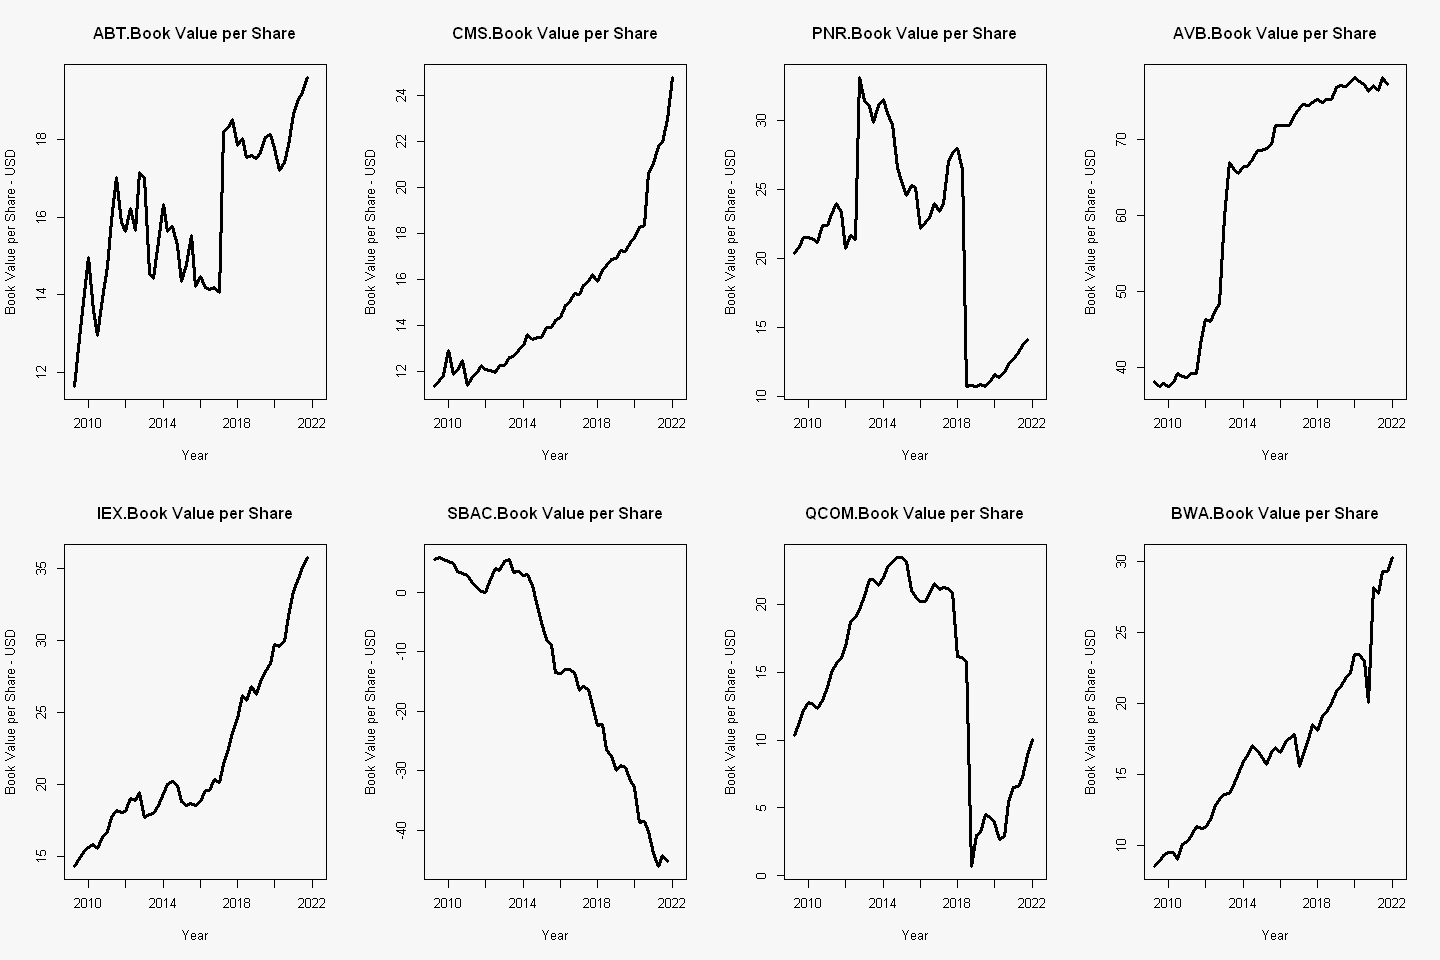

$ABT
NULL

$CMS
NULL

$PNR
NULL

$AVB
NULL

$IEX
NULL

$SBAC
NULL

$QCOM
NULL

$BWA
NULL

$WMB
NULL

$DRI
NULL

$WBA
NULL

$VLO
NULL

$CAT
NULL

$NRG
NULL

$MCK
NULL

$STZ
NULL

$ZBRA
NULL

$MHK
NULL

$LRCX
NULL

$YUM
NULL

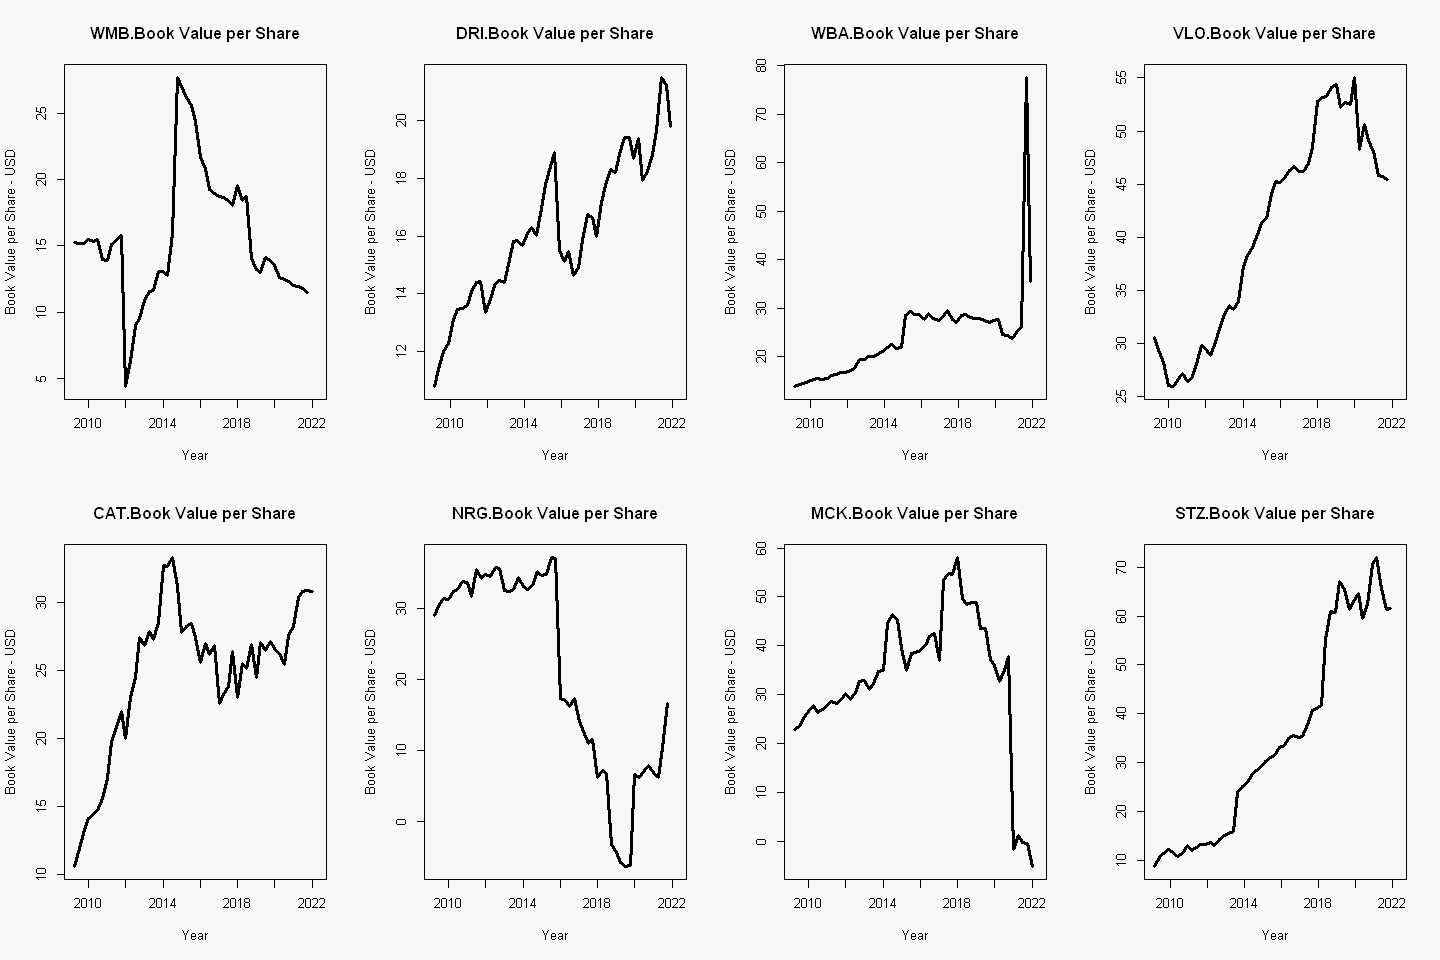

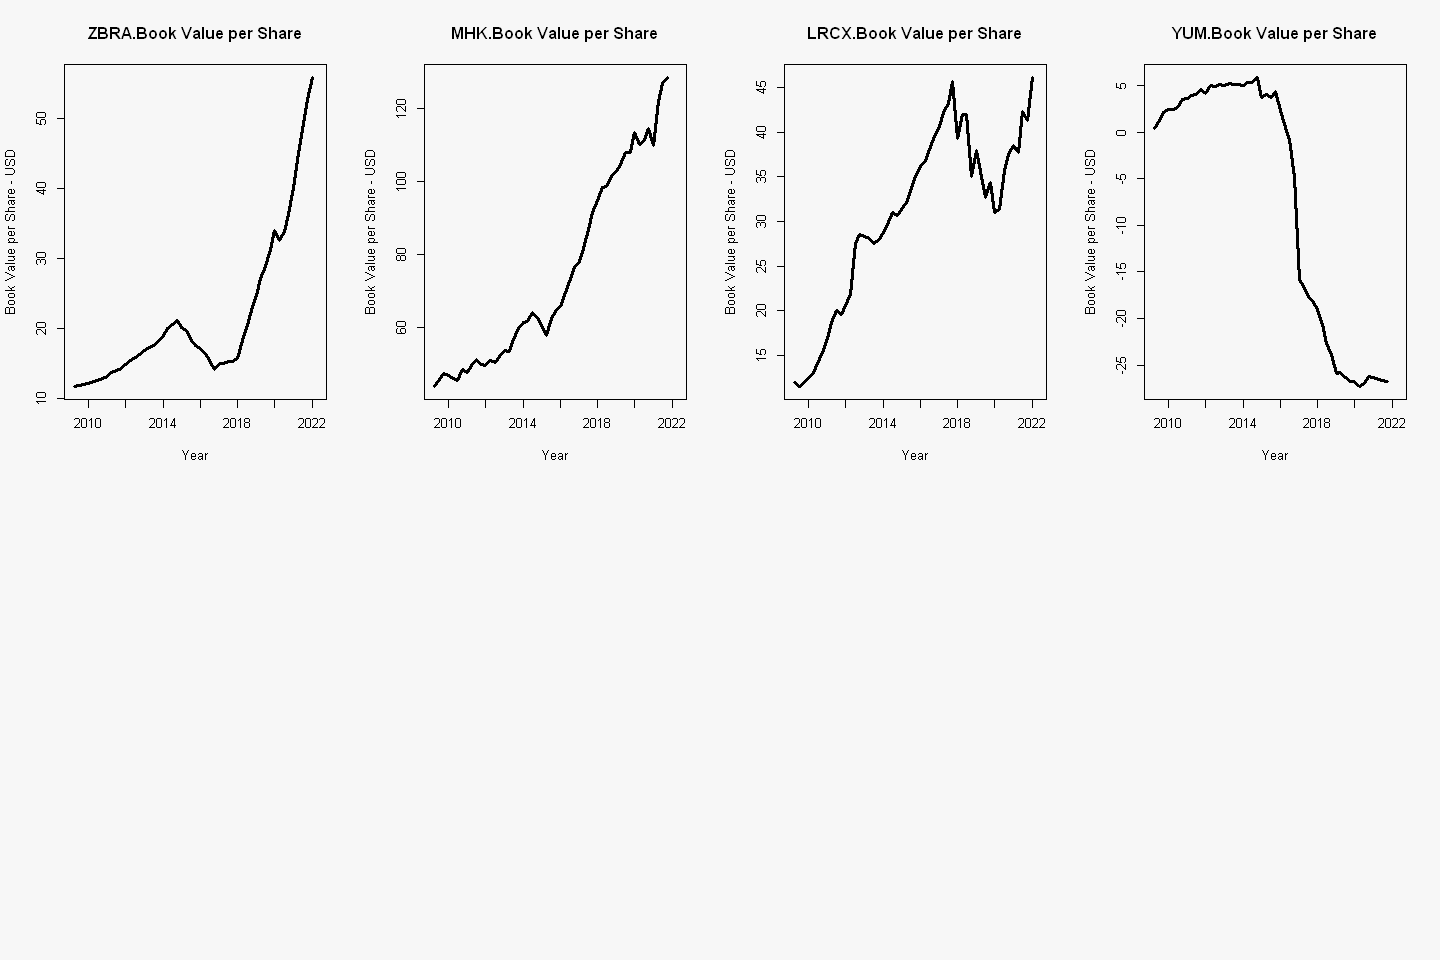

In [13]:
# Plot Book Value
par(bg = "#f7f7f7")
options(repr.plot.width = 12, repr.plot.height = 8)
par(mfrow = c(2, 4))
sapply(book_value, function(y){
    plot(index(y), y[,2], type = 'l', main= colnames(y)[2], xlab = 'Year',
     ylab = 'Book Value per Share - USD', lwd = 3)
})

* Check Market Cap Data

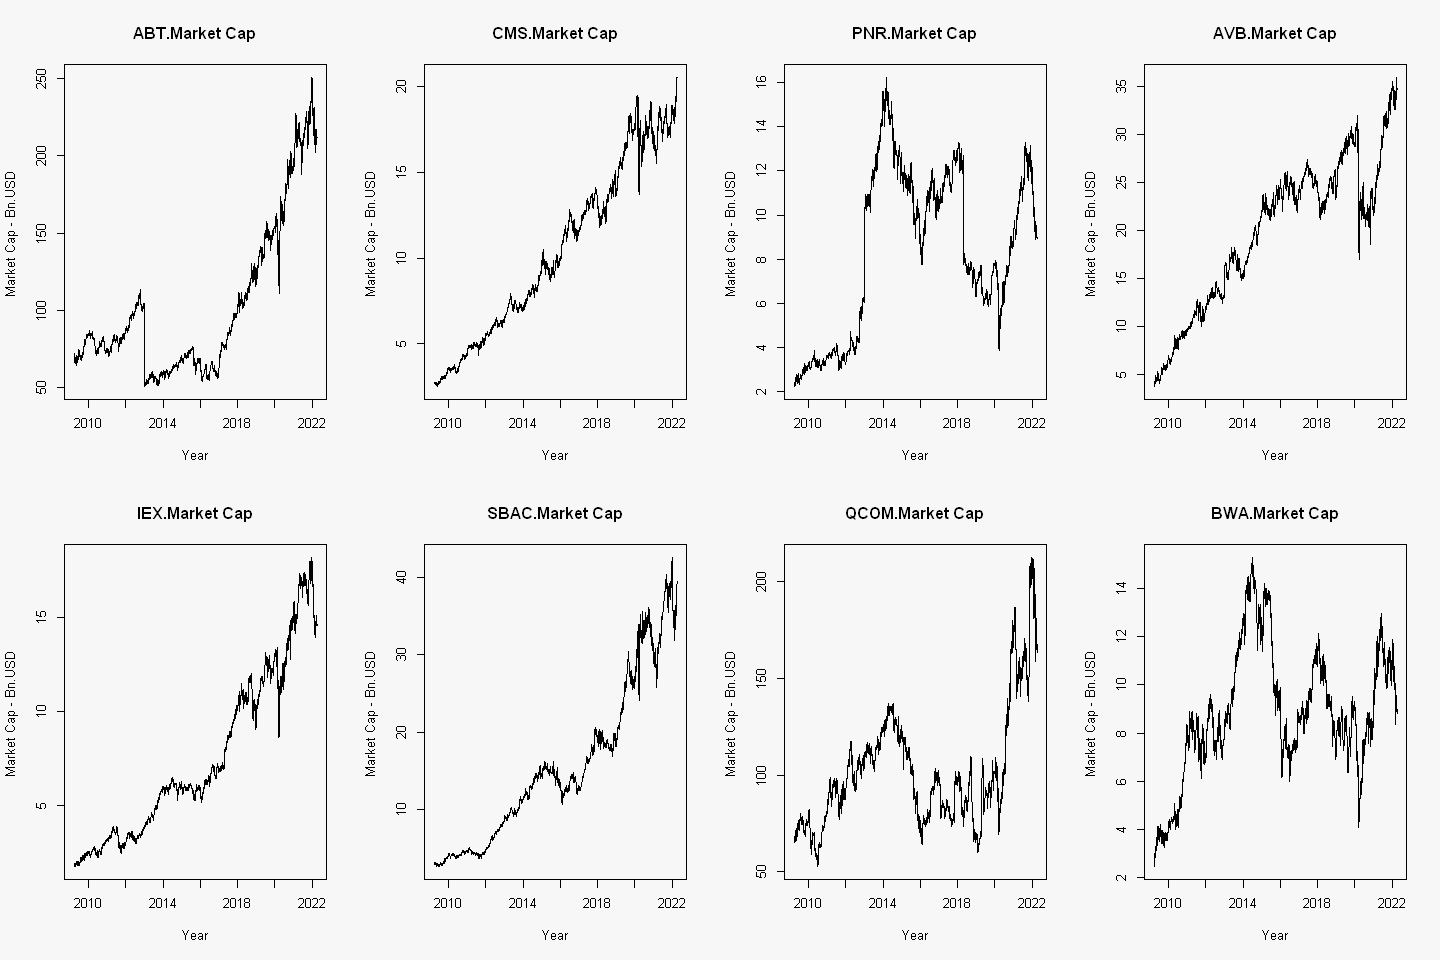

$ABT
NULL

$CMS
NULL

$PNR
NULL

$AVB
NULL

$IEX
NULL

$SBAC
NULL

$QCOM
NULL

$BWA
NULL

$WMB
NULL

$DRI
NULL

$WBA
NULL

$VLO
NULL

$CAT
NULL

$NRG
NULL

$MCK
NULL

$STZ
NULL

$ZBRA
NULL

$MHK
NULL

$LRCX
NULL

$YUM
NULL

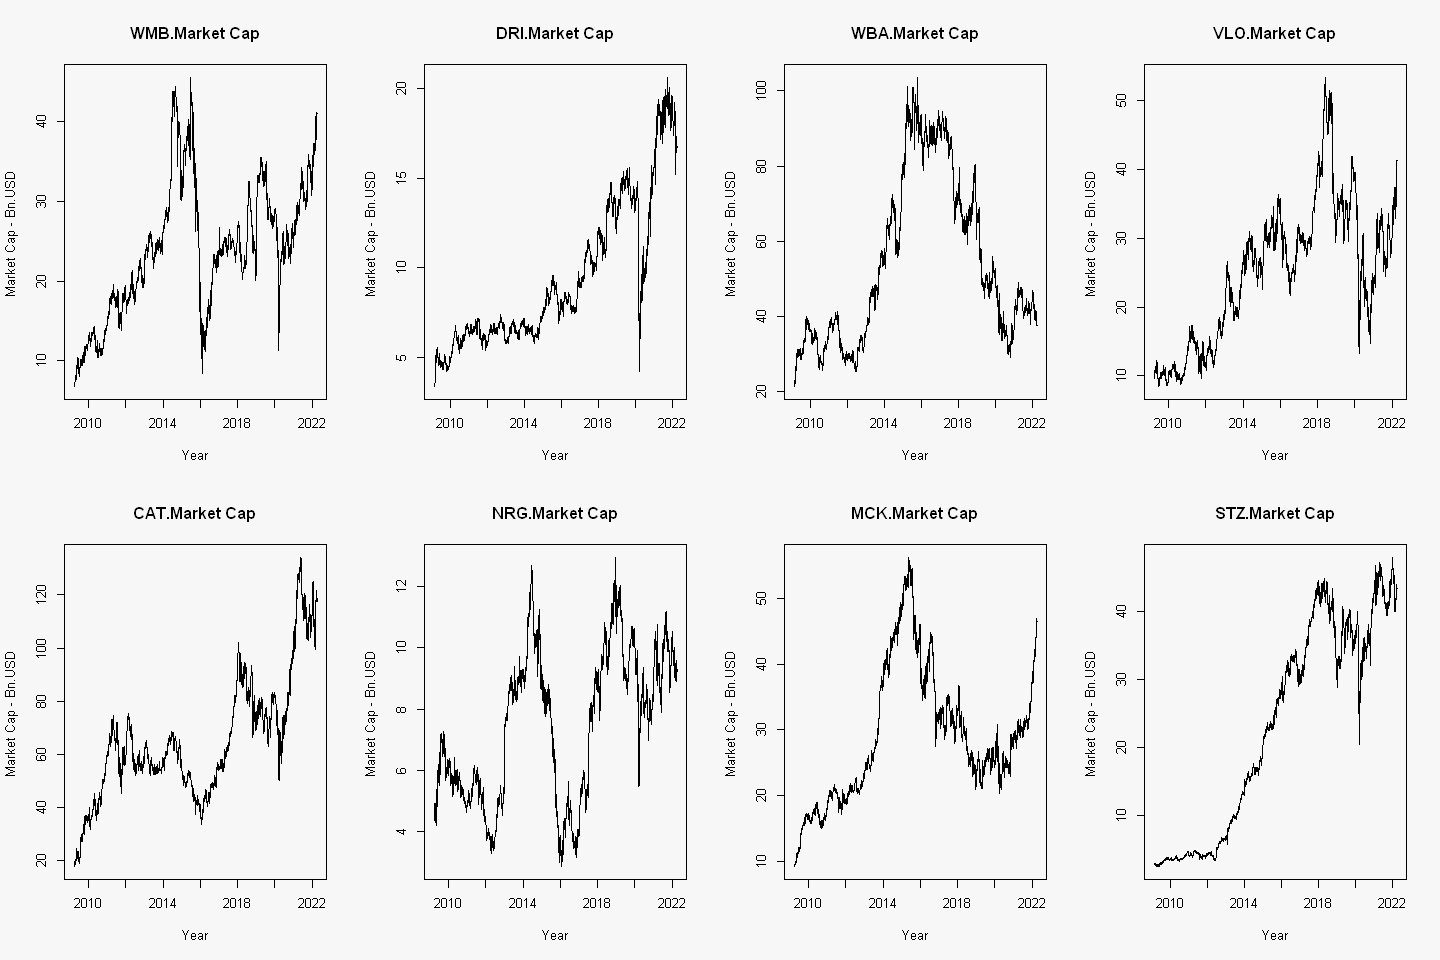

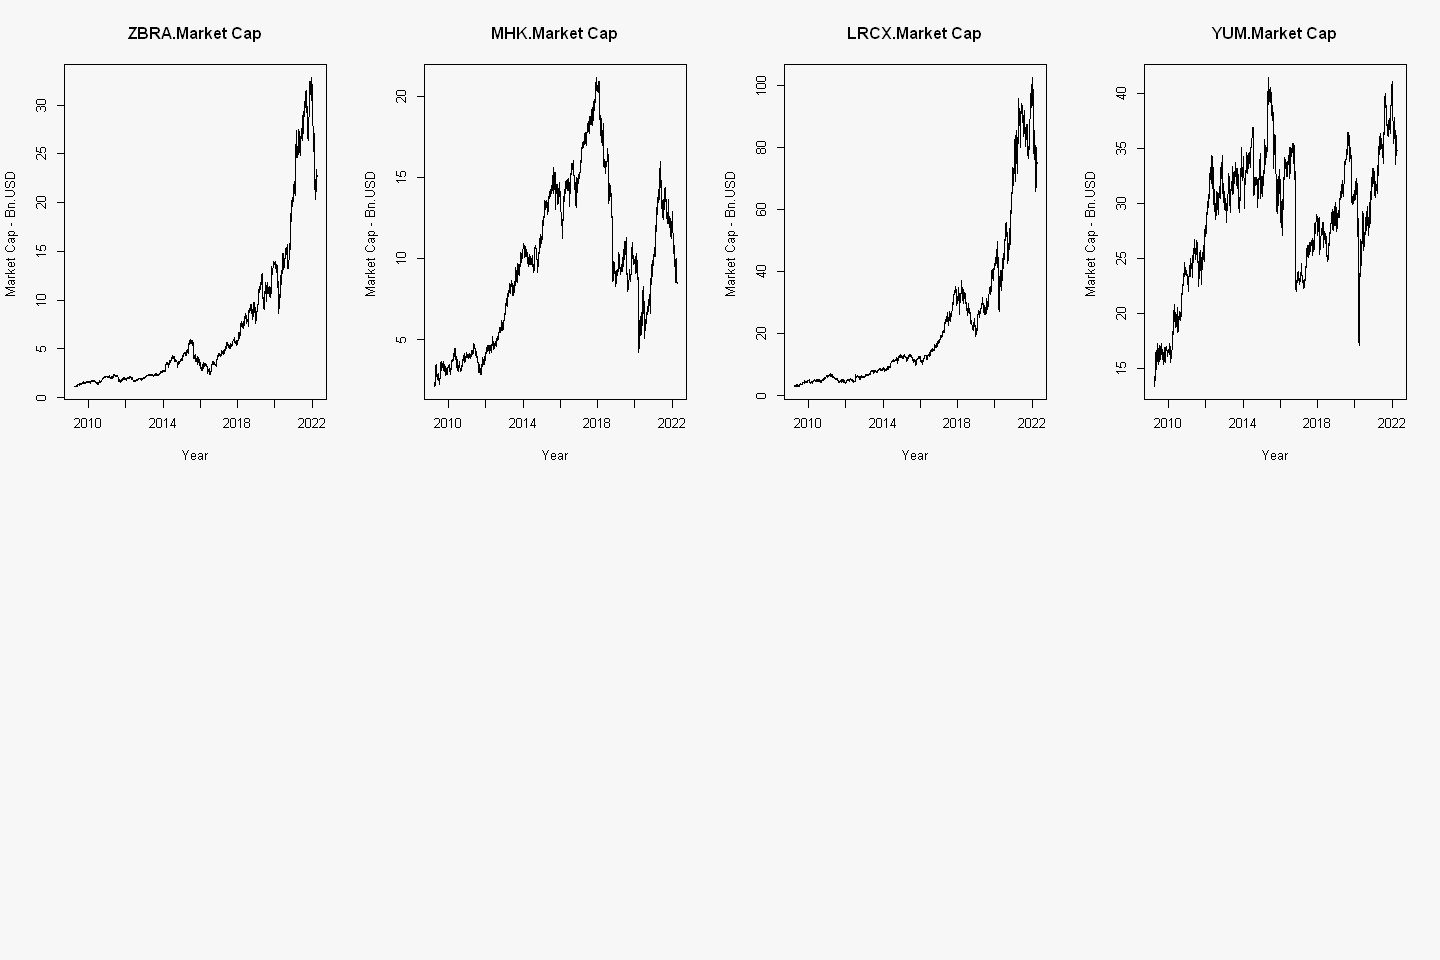

In [14]:
# Plot Market Cap
par(bg = "#f7f7f7")
options(repr.plot.width = 12, repr.plot.height = 8)
par(mfrow = c(2, 4))
sapply(MktCap, function(y){
    plot(index(y), y, type = 'l', main= colnames(y),
         xlab = 'Year', ylab = 'Market Cap - Bn.USD ')
})

****

### Task 2 - Markowitz portfolio
Using the data of the 20 stocks illustrate the portfolio performance by forming an efficient frontier.  
In this task, you will form 2 portfolios
* portfolio A will consist of stocks 1 to 10
* portfolio B will consist of stocks 11 to 20

Using the adjusted close price construct (and plot in the single figure) global minimum variance portfolio and the efficient frontier of both portfolio A and B. Since we will be working with monthly returns later in the course, use the monthly returns from the period 2015-2022 as the input for the task. **Comment the important features of the figure, e.g. which portfolio will you choose? Why? Which stock(s) is driving the shape of the frontier? etc.**

### <span style='background: lightblue'>(1). Create Monthly Return Data</span>

* Select date range as 2015-2022

In [15]:
# Function of set date range for xts
setRange <- function(xts_in, date_in){    
    return (xts_in[index(xts_in) > date_in])
}

# This is an updated function to select date range
setRange1 <- function(xts_in, date_from, date_to){    
    return (xts_in[index(xts_in) > date_from & 
             index(xts_in) < date_to])
}

# Call the function set data set only after 2015

OHLCV_2015 <- lapply(OHLCV, setRange, as.Date("2015-01-01"))
lapply(OHLCV_2015, head, 3)[1:2]
lapply(OHLCV_2015, tail, 3)[1:2]

$ABT
           ABT.Open ABT.High ABT.Low ABT.Close ABT.Volume ABT.Adjusted
2015-01-02    45.25    45.45   44.64     44.90    3216600     39.11632
2015-01-05    44.80    45.40   44.63     44.91    5735900     39.12503
2015-01-06    44.99    45.11   43.93     44.40    6584300     38.68072

$CMS
           CMS.Open CMS.High CMS.Low CMS.Close CMS.Volume CMS.Adjusted
2015-01-02    34.90    35.17   34.74     35.14    2405000     28.42490
2015-01-05    35.17    35.25   34.65     34.85    2501300     28.19032
2015-01-06    34.93    35.62   34.85     34.91    2580800     28.23886


$ABT
           ABT.Open ABT.High ABT.Low ABT.Close ABT.Volume ABT.Adjusted
2022-02-24   115.00   118.92  114.43    118.72    6252600       118.72
2022-02-25   118.72   122.93  118.50    122.41    5837700       122.41
2022-02-28   121.05   121.06  119.15    120.62    6827300       120.62

$CMS
           CMS.Open CMS.High CMS.Low CMS.Close CMS.Volume CMS.Adjusted
2022-02-24    61.73    62.15   61.16     61.97    2140300        61.97
2022-02-25    62.65    64.43   62.39     64.14    2660000        64.14
2022-02-28    63.56    64.23   63.30     64.01    2817500        64.01


* Select only adjusted close price for return calculation

In [16]:
# only need the adjusted closing price for return

OHLCV_p <- lapply(names(OHLCV_2015), function(y){
    OHLCV_2015[[y]] <- OHLCV_2015[[y]][, paste0(y, '.Adjusted')]
})
names(OHLCV_p) <- names(OHLCV_2015)

# check new data

lapply(OHLCV_p, head, 3)[1:2]
lapply(OHLCV_p, tail, 3)[1:2]

$ABT
           ABT.Adjusted
2015-01-02     39.11632
2015-01-05     39.12503
2015-01-06     38.68072

$CMS
           CMS.Adjusted
2015-01-02     28.42490
2015-01-05     28.19032
2015-01-06     28.23886


$ABT
           ABT.Adjusted
2022-02-24       118.72
2022-02-25       122.41
2022-02-28       120.62

$CMS
           CMS.Adjusted
2022-02-24        61.97
2022-02-25        64.14
2022-02-28        64.01


* calculate monthly return
$$r_{i,t}=\frac{P_{i,t}-P_{i,t-1}}{P_{i,t-1}}$$

In [17]:
# Calculate arithmetic monthly return 

rets <- lapply(OHLCV_p, monthlyReturn, type='arithmetic',
                  indexAt='yearmon', leading=FALSE)

# Remove the first invalid row
for (i in 1 : length(p_symbols)){ rets[[i]] <- rets[[i]][-1,]}

# Verify data
lapply(rets, head, 3)[1:2]
lapply(rets, tail, 3)[1:2]


$ABT
         monthly.returns
Feb 2015     0.058310981
Mar 2015    -0.021954559
Apr 2015     0.007068182

$CMS
         monthly.returns
Feb 2015     -0.06171979
Mar 2015     -0.00626251
Apr 2015     -0.02807227


$ABT
         monthly.returns
Dec 2021      0.11902691
Jan 2022     -0.09116405
Feb 2022     -0.05366386

$CMS
         monthly.returns
Dec 2021      0.10535268
Jan 2022     -0.01029987
Feb 2022      0.00135918


* Create Portflio return data for analysis

In [18]:
# n_list is the whole 20 stocks portfolio
n_list <- do.call(merge, rets)
colnames(n_list) <- names(rets)

head(n_list,3)

                  ABT         CMS          PNR         AVB          IEX
Feb 2015  0.058310981 -0.06171979  0.075392402 -0.02688026  0.067864842
Mar 2015 -0.021954559 -0.00626251 -0.053859006  0.04251315 -0.018508815
Apr 2015  0.007068182 -0.02807227 -0.004084115 -0.05687213 -0.006673931
                SBAC        QCOM         BWA        WMB         DRI         WBA
Feb 2015  0.06863755  0.16090301  0.14033687 0.11810306  0.04268502  0.13128321
Mar 2015 -0.06102162 -0.03814691 -0.01594559 0.04430769  0.08343757  0.01925902
Apr 2015 -0.01093084 -0.01932485 -0.02116395 0.01186042 -0.07170876 -0.02066660
                 VLO         CAT          NRG         MCK          STZ
Feb 2015  0.17517207  0.03663877 -0.027575194  0.07660164  0.038660151
Mar 2015  0.03128532 -0.03462003  0.050458509 -0.01093149  0.012988077
Apr 2015 -0.10562706  0.09459009  0.007690643 -0.01237843 -0.002323462
                 ZBRA          MHK        LRCX         YUM
Feb 2015  0.090941818  0.117002023  0.07875426  0

### <span style='background: lightblue'>(2). Obtain Global Minimum Variance Portlio</span>

* Creat the portfolio A with stock 1-10, and portfolio B with stock 11-20

In [19]:
# Create the portfolio A as the first 10 stocks.
returns_1 <- n_list[, 1:10]
funds_1 <- colnames(returns_1)

# Create the portfolio B as the last 10 stocks.
returns_2 <- n_list[, 11:20]
funds_2 <- colnames(returns_2)

* Add leverage constraint

In [20]:
# Create initial portfolio object with leverage and box constraints.
initial_portfolio_1 <- portfolio.spec(assets = funds_1)
initial_portfolio_1 <- add.constraint(
    portfolio = initial_portfolio_1,
    type = "leverage",
    min_sum = 0.99,
    max_sum = 1.01
)

initial_portfolio_2 <- portfolio.spec(assets = funds_2)
initial_portfolio_2 <- add.constraint(
    portfolio = initial_portfolio_2,
    type = "leverage",
    min_sum = 0.99,
    max_sum = 1.01
)

**The constraints required in task 2 shows that it is a Markowitz portfolio with the full-investment specification. Therefore, we set "min_sum = 0.99, max_sum = 1.01" to constraint the portfolios.**

* Optimize the portfolio with minimum variance

In [21]:
# Obtain optimized portfolio by optimize.portfolio function
minvar_1 <- add.objective(portfolio = initial_portfolio_1, type = "risk", name = "var")
opt_minvar_1 <- optimize.portfolio(
    R = returns_1,
    portfolio = minvar_1,
    optimize_method = "ROI",
    trace = TRUE
)

minvar_2 <- add.objective(portfolio = initial_portfolio_2, type = "risk", name = "var")
opt_minvar_2 <- optimize.portfolio(
    R = returns_2,
    portfolio = minvar_2,
    optimize_method = "ROI",
    trace = TRUE
)

* Print the global minimum variance portfolio A and observe the plot

***********************************
PortfolioAnalytics Optimization
***********************************

Call:
optimize.portfolio(R = returns_1, portfolio = minvar_1, optimize_method = "ROI", 
    trace = TRUE)

Optimal Weights:
    ABT     CMS     PNR     AVB     IEX    SBAC    QCOM     BWA     WMB     DRI 
 0.1473  0.5635 -0.0334  0.0209  0.0480  0.0430  0.0259  0.0195  0.1259  0.0293 

Objective Measure:
 StdDev 
0.03525 




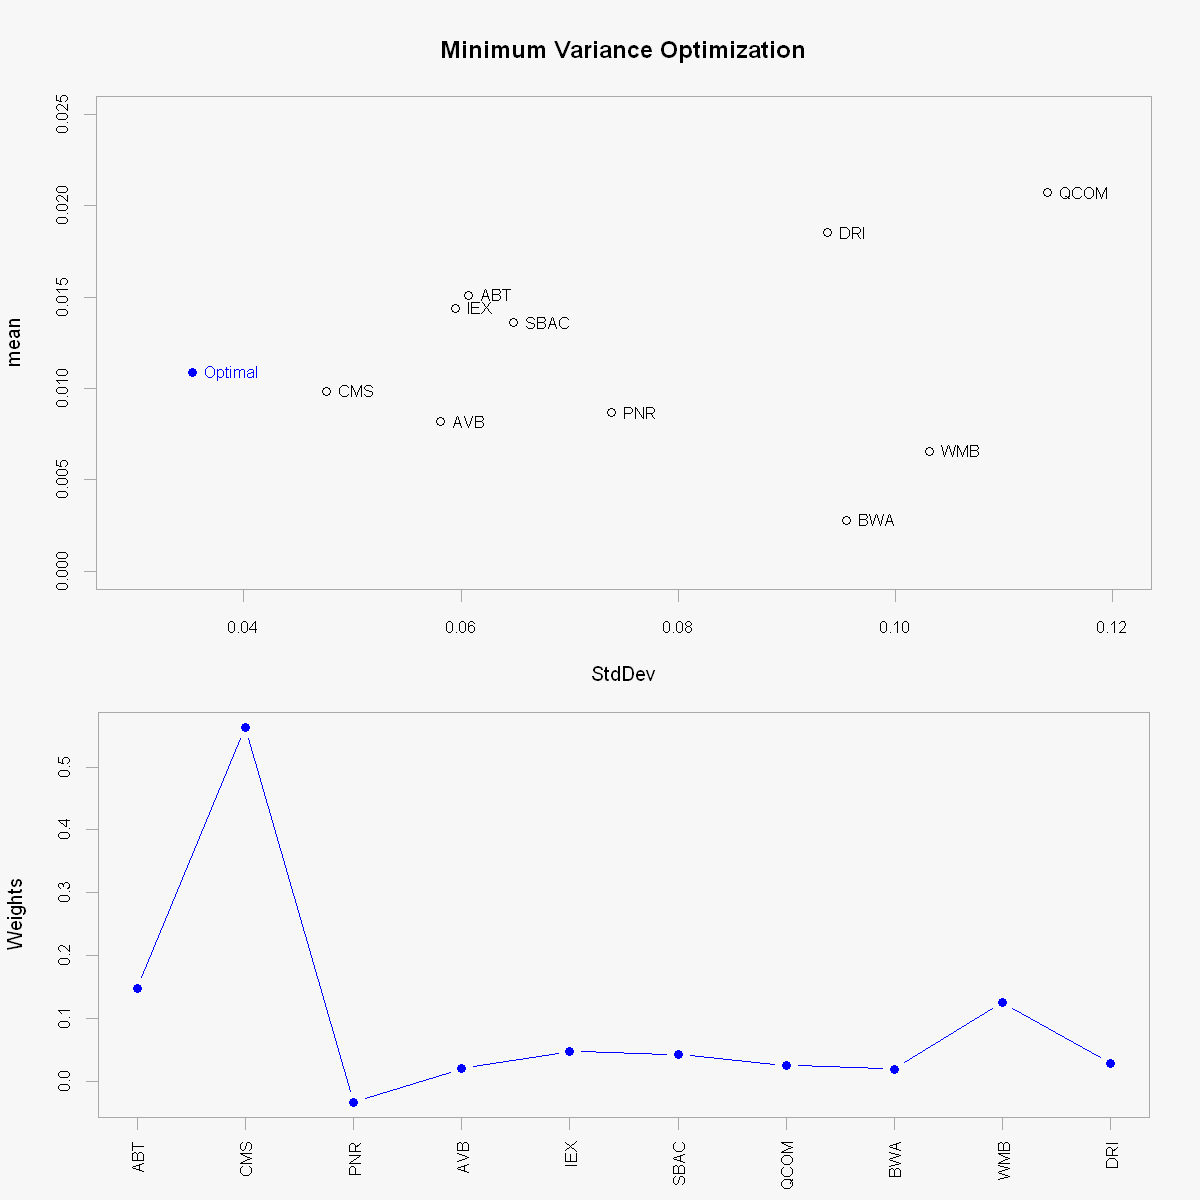

In [22]:
opt_minvar_1

# For portfolio 1, Show each stock analsis in plot
par(bg = "#f7f7f7")
options(repr.plot.width = 10, repr.plot.height = 10)
plot(
    opt_minvar_1,
    risk.col = "StdDev",
    return.col = "mean",
    main = "Minimum Variance Optimization",
    chart.assets = TRUE,
    xlim = c(0.03, 0.12),
    ylim = c(0, 0.025)
)

**The standard deviation for optimal portfolio A is 0.035, and the expected return is 0.011(1.1%).**

* Print the global minimum variance portfolio B

***********************************
PortfolioAnalytics Optimization
***********************************

Call:
optimize.portfolio(R = returns_2, portfolio = minvar_2, optimize_method = "ROI", 
    trace = TRUE)

Optimal Weights:
    WBA     VLO     CAT     NRG     MCK     STZ    ZBRA     MHK    LRCX     YUM 
 0.2217 -0.0824  0.2414  0.0366  0.1275  0.2591 -0.0332 -0.0562  0.0174  0.2582 

Objective Measure:
 StdDev 
0.04534 




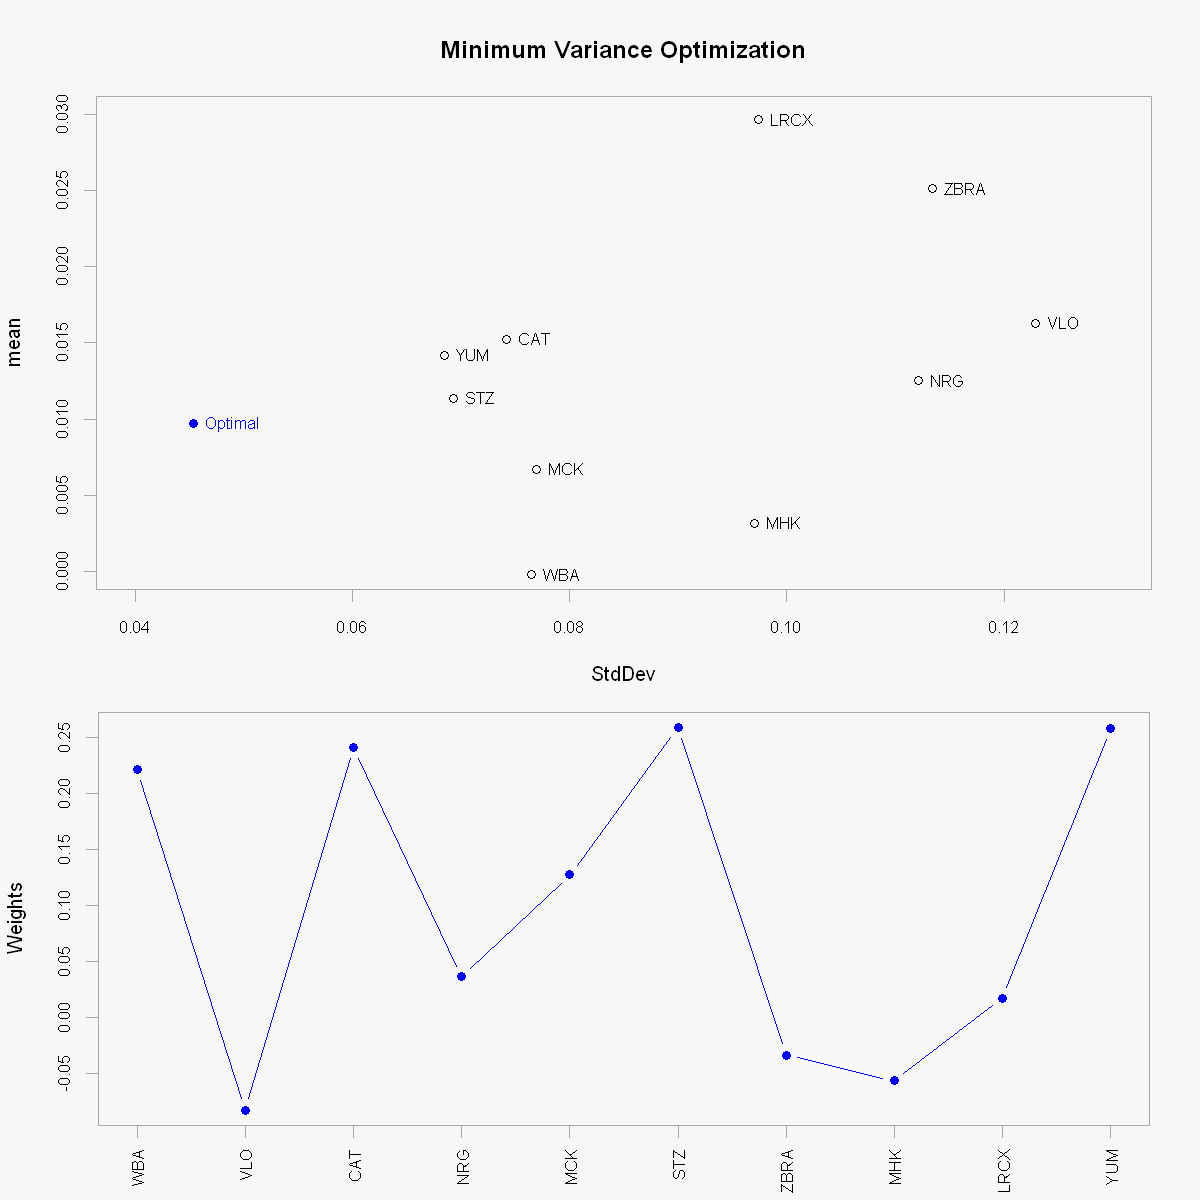

In [23]:
opt_minvar_2

# For portfolio 2, Show each stock analsis in plot
par(bg = "#f7f7f7")
options(repr.plot.width = 10, repr.plot.height = 10)

plot(
    opt_minvar_2,
    risk.col = "StdDev",
    return.col = "mean",
    main = "Minimum Variance Optimization",
    chart.assets = TRUE,
    xlim = c(0.04, 0.13),
    ylim = c(0, 0.03)
)

**The standard deviation for optimal portfolio B is 0.045, and the expected return is 0.009(0.9%).**


* Plot the efficient frontiers for GMVP A and B

### <span style='background: lightblue'>(3). Plot Efficient Frontiers for Portlio A and B</span>

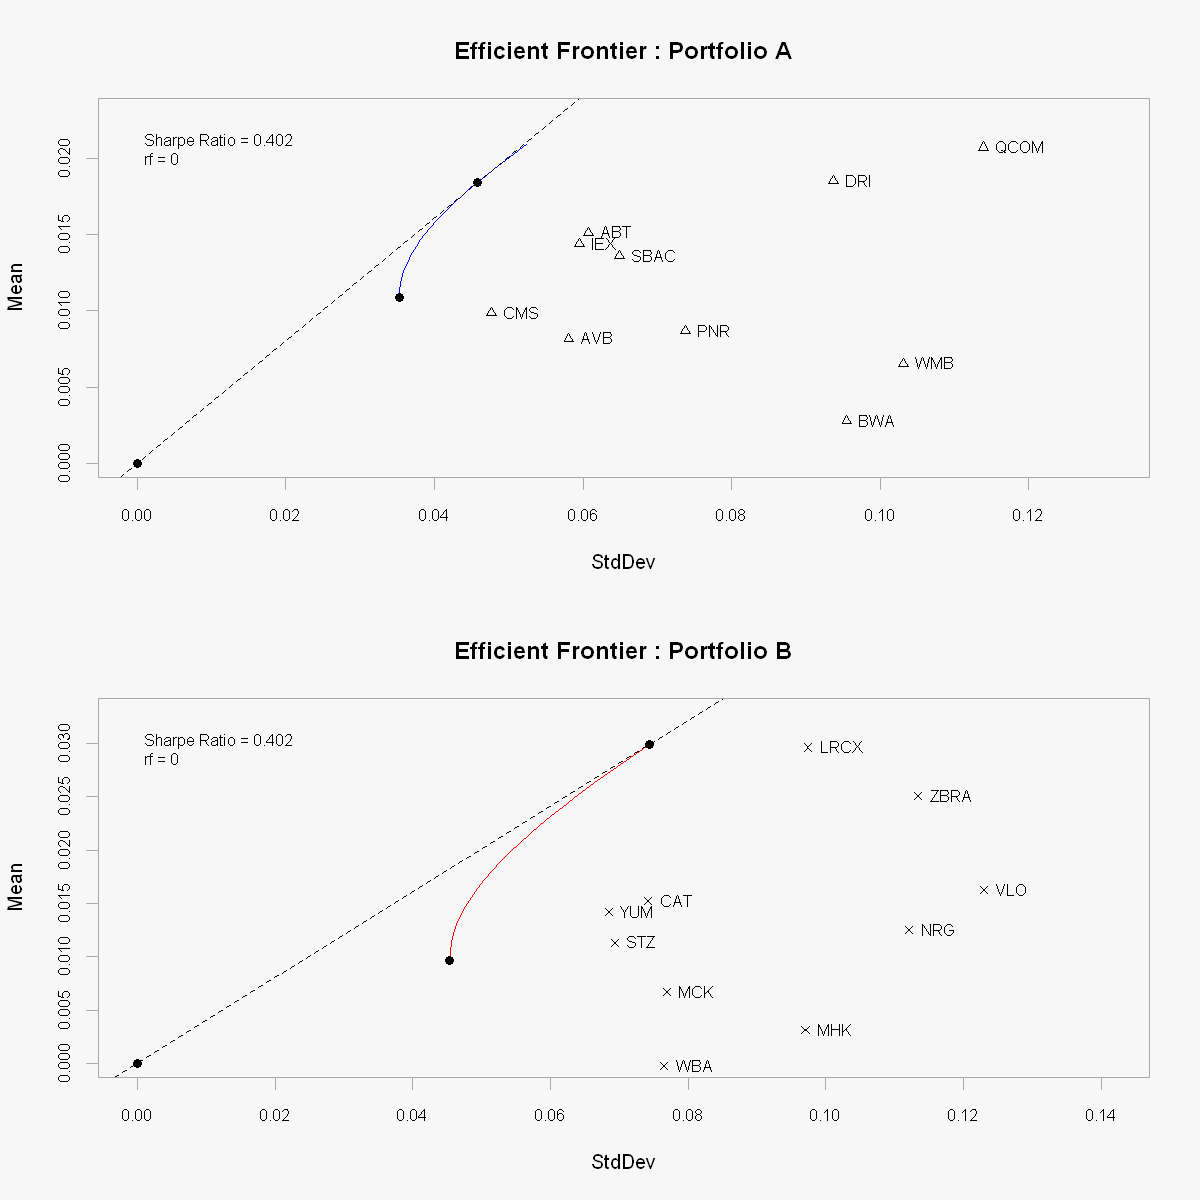

In [43]:
# Plot the efficient frontier for portfolio 1.
meanvar_1 <- create.EfficientFrontier(R = returns_1, portfolio = initial_portfolio_1, 
                                      type = 'mean-var')
meanvar_2 <- create.EfficientFrontier(R = returns_2, portfolio = initial_portfolio_2, 
                                      type = 'mean-var')

par(bg = "#f7f7f7")
options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow = c(2,1))

chart.EfficientFrontier(meanvar_1, match.col = 'StdDev',type = 'l', pch.assets=2, col = "blue",
        RAR.text = 'Sharpe Ratio', pch = 4,  main = "Efficient Frontier : Portfolio A")
chart.EfficientFrontier(meanvar_2, match.col = 'StdDev', type = 'l', pch.assets=4, col = "red", 
        RAR.text = 'Sharpe Ratio', pch = 4, main = "Efficient Frontier : Portfolio B")

**Comments:  
   We will choose portfolio A. Because the figures of efficient frontier illustrate that GMVP A has a lower risk (standard deviation) than GMVP B. However, GMVP A has a higher expected returns than GMVP B, that is, a higher Sharpe ratio. Therefore, portfolio A has lower risk and higher Sharpe ratio.  
    According to the figure of portfolio A, CMS is the predominant stock, which has the lowest standard deviation. Meanwhile, CMS is the closest stock to the GMVP A.  
    However, for the portfolio B, there are several stocks driving the shape of the frontier with similar risks. They are YUM, STZ, CAT,and WBA. Although WBA has a very low expected return, it still composed largely to the portfolio B duo to its low risk.**

****

### Task 3 - Stock index 
Using the monthly prices from *Task 2* create three price indexes
* simple price weighted index, 
* market-capitalization weighted index, 
* equally weighted index, 

**Create the plot containing all three indexes and comment on their difference.**

### <span style='background: lightblue'>(1). Price Weighted Index</span>

* Download stock splits data.

In [25]:
# Download stock splits and dividends data of 2015-2022
splits <- lapply(p_symbols, function(y)
{
    getSplits(y, from = as.Date('2015-01-01'), to = '2022-02-28')
})
names(splits) <- p_symbols

# Download stock dividends data of 2015-2022
raw_dividends <- lapply(p_symbols, function(y)
{
    getDividends(y, from = as.Date('2015-01-01'), 
                 to = '2022-02-28', split.adjust = FALSE)
})
names(raw_dividends) <- p_symbols

#Show splits dates in our portfolio
splits_s <- splits[-which(is.na(splits))]
splits_s

$PNR
             PNR.spl
2018-05-01 0.6715917

$DRI
           DRI.spl
2015-11-10  0.8939

$YUM
             YUM.spl
2016-11-01 0.7189073


We can find that during 2015-2022 there were only 3 stock splits within our 20 stocks portfolio:  
<span style='background:yellow'>**PNR at 2018-05-01, DRI at 2015-11-10, YUM at 2016-11-01.**</span>   
We will calculate the unadjusted close prices for these 3 stocks, then calculate divisor change in these 3 dates.

* Generate unadjusted price

In [26]:
# Calculate ratio, and create unadjusted_close prices  
S <- length(p_symbols)
# Create a xts list for split and div ratio
ratios <- list()
# Create a xts list for unadjusted_close prices
OHLCV_unadj <- list()
for (i in 1 : S){    
    ratios[[i]] <- adjRatios(splits[[i]], raw_dividends[[i]], OHLCV_p[[i]])
    OHLCV_unadj[[i]] <- OHLCV_p[[i]] / (ratios[[i]][, "Split"] * ratios[[i]][, "Div"])
    colnames(OHLCV_unadj[[i]]) <- paste0(p_symbols[i],".Unadjusted_close")
}
names(ratios) <- p_symbols
names(OHLCV_unadj) <- p_symbols

Check split data for YUM split on 2016-11-01 as an example:

In [27]:
# split happen time
splits[["YUM"]] 
# check ratio change during the period
ratios[["YUM"]]["2016-10-28/2016-11-02"] 
# check close prices during the period
OHLCV_p[["YUM"]]["2016-10-28/2016-11-02"]
# check unadjusted_close prices change during the period
OHLCV_unadj[["YUM"]]["2016-10-28/2016-11-02"]

             YUM.spl
2016-11-01 0.7189073

               Split       Div
2016-10-28 0.7189073 0.9085359
2016-10-31 0.7189073 0.9085359
2016-11-01 1.0000000 0.9085359
2016-11-02 1.0000000 0.9085359

           YUM.Adjusted
2016-10-28     56.24234
2016-10-31     56.60975
2016-11-01     55.38923
2016-11-02     54.48571

           YUM.Unadjusted_close
2016-10-28             86.10897
2016-10-31             86.67150
2016-11-01             60.96537
2016-11-02             59.97089

By checking the dates at stock splits period for YUM, we could noticed that **Unadjusted_closs** prices show a  <span style='background:yellow'>**sudden "drop"**</span> after the splits.

* Get monthly sum prices from unadjusted parices

In [28]:
# Call to.period function
OHLCV_u <- lapply(OHLCV_unadj,to.period, period = 'months', indexAt='yearmon', name=NULL)

# Selected Close data as monthly market cap 
OHLCV_unadjm <- lapply(p_symbols, function(y){
    OHLCV_u[[y]] <- OHLCV_u[[y]][, 'Close']
})
names(OHLCV_unadjm) <- p_symbols

#Show monthly prices around the splits month
OHLCV_unadjm[["PNR"]]["2018-03/2018-06"]
OHLCV_unadjm[["DRI"]]["2015-09/2015-12"]
OHLCV_unadjm[["YUM"]]["2016-09/2016-12"]

            Close
Mar 2018 68.30409
Apr 2018 67.41595
May 2018 43.72816
Jun 2018 42.16503

            Close
Sep 2015 69.75296
Oct 2015 62.87343
Nov 2015 57.06254
Dec 2015 64.65122

            Close
Sep 2016 91.29854
Oct 2016 86.67150
Nov 2016 63.67763
Dec 2016 63.61736

From monthly price, we still can find a price "drop" in the stock splits month.

In [29]:
# Calculate cross sector sum of data
getSum <- function(list_in){   
    # Get row numbers    
    N <- nrow(list_in[[1]])  
    # calculate sum
    p_sum <- sapply(1:N, function(y){
       sum(sapply(list_in, '[[', y)) 
    })
    # Set xts format
    xts_sum <- as.xts(p_sum, order.by = index(list_in[[1]]))
    names(xts_sum) <- "Sum"    
    return (xts_sum)
}

# call getSum function to get sum prices
price_s <- getSum(OHLCV_unadjm)

# check results
head(price_s, 3)
tail(price_s, 3)

              Sum
Jan 2015 1702.758
Feb 2015 1824.843
Mar 2015 1806.421

              Sum
Dec 2021 4067.023
Jan 2022 3675.026
Feb 2022 3444.519

* Create Price weighted Index

We set the first period divisor to the number that <span style='background:yellow'>**makes Index initial value to be 100**</span>(instead of using 20 as the index divisor), for easier comparison with other indexs later.

**We use the following precedure to calculate new divisors that are influenced by stock splits:**
* calcultate splits and dividents ratio, and obtain unadjusted price;
* calculate divisor, assume monthly return no change at split time t, then use t-1 month index and sum(price) of month t, to calculate  new divisor at month t.  
$$d_{1}=\frac{Price_{1}}{100}$$
<span style='color:blue'>**In normal days:**</span> 
$$d_{t} = d_{t-1}$$
$$Index_{t}=\frac{Price_{t}}{d_{t}}$$
<span style='color:blue'>**When split happens:**</span>  
$$Index_{t} = Index_{t-1}$$
$$d_{t}=\frac{Price_{t}}{Index_{t}}$$

In [30]:
# Create the split date vector
split_date <- as.yearmon(index(do.call(rbind, splits_s)))
split_date

[1] "Nov 2015" "Nov 2016" "May 2018"

In [31]:
# Create index
T    <- nrow(price_s)  

#Set initial index value
p    <- vector()
p[1] <- 100

# set initial divisor
d    <- vector()
d[1] <- price_s[1] / 100 
print("First divisor:")
d[1]

for (i in 2 : T){
    if (index(price_s[i]) %in% split_date){
        # Calculate divisor at split date
        print(index(price_s[i]))
        # Index remain same
        p[i] <- p[i-1]
        # Use new prices to update divisor
        d[i] <- price_s[i] / p[i]       
        print(d[i])
    } else {
        # For normal date, divisor stay same
        d[i] <- d[i-1]
        # Use new prices to calculate index
        p[i] <- price_s[i] / d[i]
    }
}

# Print out divisor value for checking

[1] "First divisor:"


[1] 17.02758

[1] "Nov 2015"
[1] 17.00028
[1] "Nov 2016"
[1] 17.25035
[1] "May 2018"
[1] 17.2443


From the output, we could see the divisor changed at splits days.

In [32]:
# Format index to Time Series 
index_1 <- as.xts(p, order.by = index(price_s))
names(index_1) <- "Price Weighted Index"

# check results
head(index_1,3)
tail(index_1,3)

         Price Weighted Index
Jan 2015             100.0000
Feb 2015             107.1699
Mar 2015             106.0880

         Price Weighted Index
Dec 2021             235.8474
Jan 2022             213.1154
Feb 2022             199.7482

### <span style='background: lightblue'>(2). Market-capitalizaion Weighted Index</span>

* Get monthly Market Cap data

In [33]:
# Call the function set data set only after 2015
MktCap_2015 <- lapply(MktCap, setRange1, as.Date("2015-01-01"), as.Date("2022-03-01"))

# Call to.period function
MktCap_mon <- lapply(MktCap_2015,to.period, period = 'months', indexAt='yearmon', name=NULL)

# Selected Close data as monthly market cap 
MktCap_m <- lapply(names(MktCap_mon), function(y){
    MktCap_mon[[y]] <- MktCap_mon[[y]][, 'Close']
})
names(MktCap_m) <- names(MktCap_mon)

# p_list is the whole 20 stocks market cap for check
mc_list <- do.call(merge, MktCap_m)
colnames(mc_list) <- names(MktCap_m)

# Check monthly market cap data 
lapply(mc_list, head, 3)[1:2]
lapply(mc_list, tail, 3)[1:2]

$ABT
           ABT
Jan 2015 67.36
Feb 2015 71.29
Mar 2015 69.73

$CMS
           CMS
Jan 2015 10.37
Feb 2015  9.65
Mar 2015  9.59


$ABT
            ABT
Dec 2021 249.75
Jan 2022 226.18
Feb 2022 214.04

$CMS
           CMS
Dec 2021 18.80
Jan 2022 18.61
Feb 2022 18.50


* Calculate the Sum of Market Cap


In [34]:
# Calculate cross sector sum of Mark Cap
mc_sum <- getSum(MktCap_m)
date_index <- index(mc_sum)

# check result

head(mc_sum, 3)
tail(mc_sum, 3)

            Sum
Jan 2015 579.27
Feb 2015 633.52
Mar 2015 629.94

             Sum
Dec 2021 1114.04
Jan 2022 1041.87
Feb 2022  997.51

* Create Mark Cap Index

We set the first period divisor to the number that makes <span style='background:yellow'>**Index initial value to be 100**</span>, for easier comparison with other indexs later.

**We use the following formula to calculate market cap index:  
Set the index of January 2015 as the base index, which equals to 100**
$$Index_{t}=\frac{TOTAL-MKT-CAP_t}{TOTAL-MKT-CAP_0}*100$$


In [35]:
#Create index2
d2 <- as.numeric(mc_sum[1] / 100) 
# set initial divisor
d2

index_2 <- mc_sum/d2
names(index_2) <- "Market-Cap Weighted Index"

# check result
head(index_2, 3)
tail(index_2, 3)

[1] 5.7927

         Market-Cap Weighted Index
Jan 2015                  100.0000
Feb 2015                  109.3652
Mar 2015                  108.7472

         Market-Cap Weighted Index
Dec 2021                  192.3179
Jan 2022                  179.8591
Feb 2022                  172.2012

### <span style='background: lightblue'>(3). Equally Weighted Index</span>

* Calculate mean of returns

In [36]:
# r_list is the whole 20 stocks returns
r_list <- do.call(merge, rets)
colnames(r_list) <- names(rets)

head(r_list, 3)

                  ABT         CMS          PNR         AVB          IEX
Feb 2015  0.058310981 -0.06171979  0.075392402 -0.02688026  0.067864842
Mar 2015 -0.021954559 -0.00626251 -0.053859006  0.04251315 -0.018508815
Apr 2015  0.007068182 -0.02807227 -0.004084115 -0.05687213 -0.006673931
                SBAC        QCOM         BWA        WMB         DRI         WBA
Feb 2015  0.06863755  0.16090301  0.14033687 0.11810306  0.04268502  0.13128321
Mar 2015 -0.06102162 -0.03814691 -0.01594559 0.04430769  0.08343757  0.01925902
Apr 2015 -0.01093084 -0.01932485 -0.02116395 0.01186042 -0.07170876 -0.02066660
                 VLO         CAT          NRG         MCK          STZ
Feb 2015  0.17517207  0.03663877 -0.027575194  0.07660164  0.038660151
Mar 2015  0.03128532 -0.03462003  0.050458509 -0.01093149  0.012988077
Apr 2015 -0.10562706  0.09459009  0.007690643 -0.01237843 -0.002323462
                 ZBRA          MHK        LRCX         YUM
Feb 2015  0.090941818  0.117002023  0.07875426  0

In [37]:
# Calculate cross sector mean of data
getMean <- function(list_in){   
    # Get row numbers    
    N <- nrow(list_in[[1]])  
    # calculate sum
    p_mean <- sapply(1:N, function(y){
       mean(sapply(list_in, '[[', y)) 
    })
    # Set xts format
    xts_mean <- as.xts(p_mean, order.by = index(list_in[[1]]))
    names(xts_mean) <- "Mean"    
    return (xts_mean)
}

# call getSum function to get sum prices
ret_mean <- getMean(rets)

# check result
head(ret_mean, 3)
tail(ret_mean, 3)

                 Mean
Feb 2015  0.074163803
Mar 2015 -0.007438683
Apr 2015 -0.005678243

                Mean
Dec 2021  0.08493752
Jan 2022 -0.05463511
Feb 2022 -0.04445353

* Create Equally Weighted Index

We set the first period divisor to the number that makes <span style='background:yellow'>**Index initial value to be 100**</span>, for easier comparison with other indexs later.

**We use the following formula to calculate equally weighted index:  
Set the index of 2015 as the base year, and the index of base year equals to 100**
$$Index_{t}={(MEAN-OF-RETURN_{t-1}+1)}*Index_{t-1}$$

In [38]:
#Create index
T    <- nrow(ret_mean) + 1 
p    <- vector()
#Set initial condition
p[1] <- 100
#Simulate
for (i in 2 : T){p[i] <- p[i-1] * (1 + ret_mean[i-1] )}

index_3 <- as.xts(p, order.by = date_index)
names(index_3) <- "Equally Weighted Index"

# check result
head(index_3, 3)
tail(index_3, 3)

         Equally Weighted Index
Jan 2015               100.0000
Feb 2015               107.4164
Mar 2015               106.6173

         Equally Weighted Index
Dec 2021               289.4620
Jan 2022               273.6472
Feb 2022               261.4826

### <span style='background: lightblue'>(4). Conclusion</span>

* Portfolio Index Chart observation

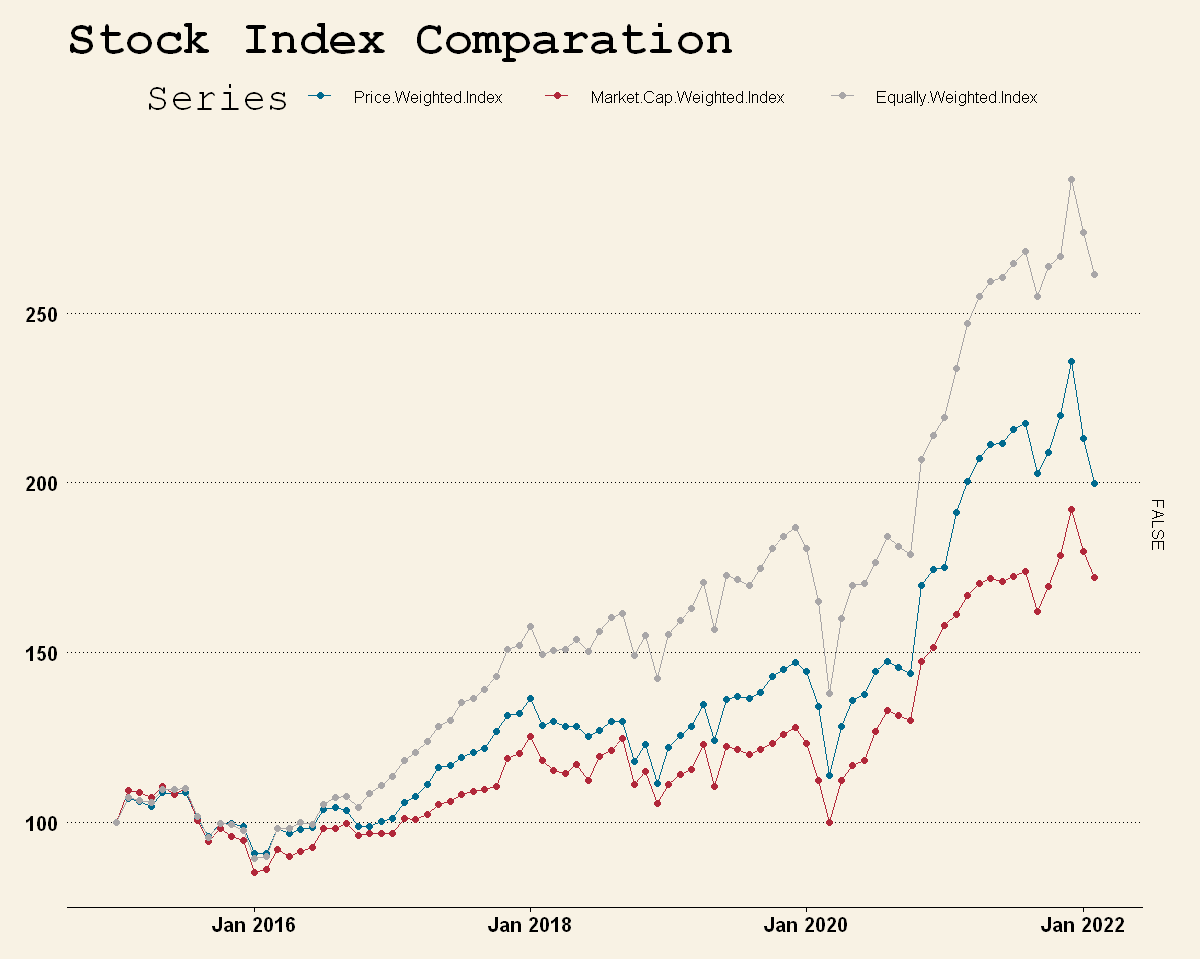

In [39]:
options(repr.plot.width = 10, repr.plot.height = 8)
t_index <- merge(index_1, index_2, index_3, all=TRUE)
autoplot(t_index, facets = FALSE) + geom_line() + geom_point() + 
    theme_wsj()+ scale_colour_wsj("dem_rep")+ ggtitle("Stock Index Comparation")

**Comments:  
From the plot, we can easily find that the three indexs have a very similar variation trend.However, the equally weighted index has the largest fluctuation while the market-capitalization weighted index has the smallest fluctuation.Such differences are mainly due to the differences in weightng decisions.**

* To better illustrate the influence of stock price level on **Price Weighted Index**, we compare two different stock prices with the index, one is LRCX, which has the highest price among the 20 stocks, and another is WMB, which has a very low price.From the plot below, we can find that the stock LRCX seems to have larger influence on the index.

         Price Weighted Index      WMB     LRCX
Sep 2021             202.9033 25.61178 567.3365
Oct 2021             209.0781 27.73457 561.7742
Nov 2021             219.8252 26.45102 677.6837
Dec 2021             235.8474 25.69948 716.8500
Jan 2022             213.1154 29.54848 588.0333
Feb 2022             199.7482 30.87095 559.5546

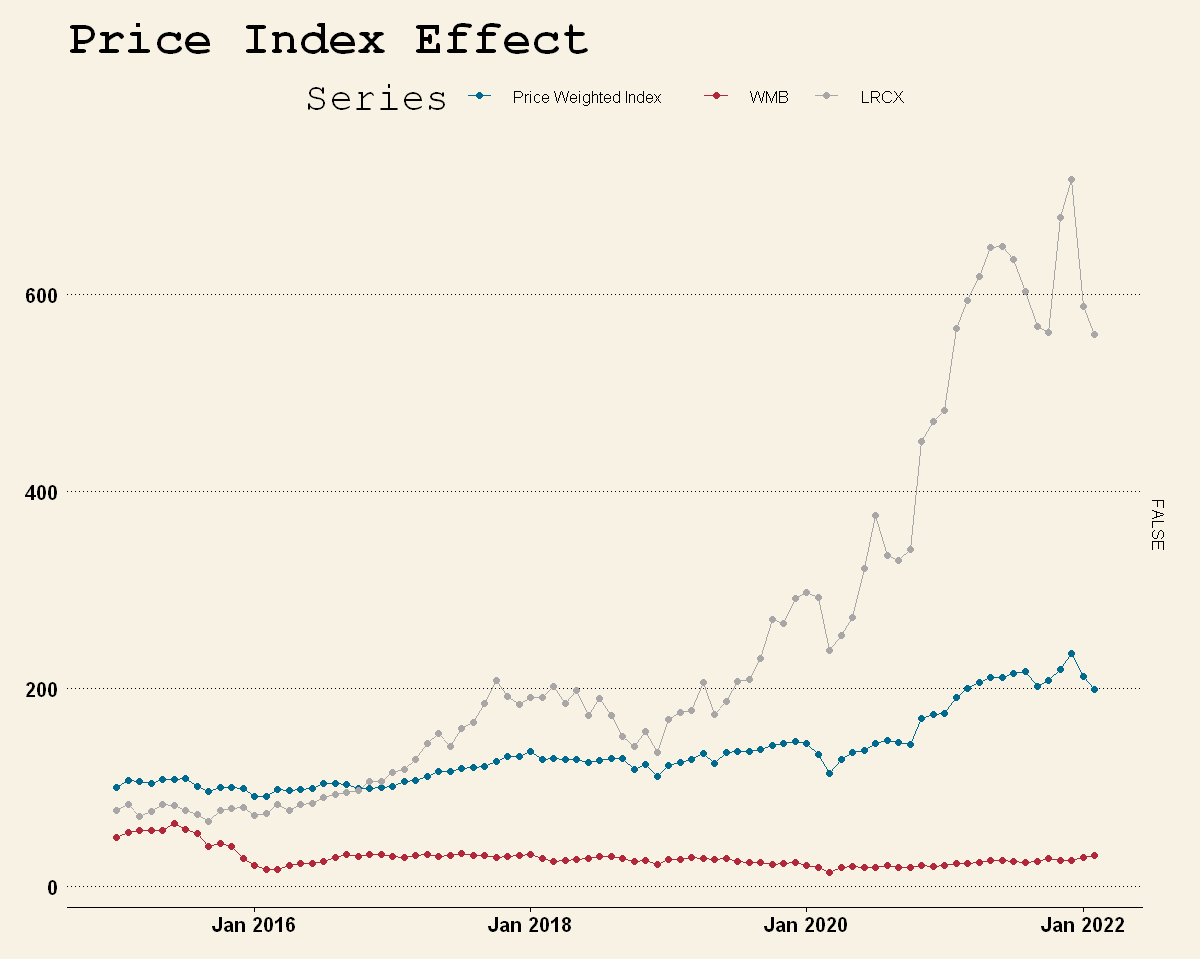

In [40]:
OHLCV_unadjm_list <- do.call(merge, OHLCV_unadjm)
colnames(OHLCV_unadjm_list) <- names(OHLCV_unadjm)

p_index <- full_join(tk_tbl(index_1), tk_tbl(OHLCV_unadjm_list), by = "index" )
p_index1 <- xts(p_index[,c(2,11,21)],p_index$index)
tail(p_index1)

#compare the effect to index with LRCX(high price stock) and WMB(low price stock)
options(repr.plot.width = 10, repr.plot.height = 8)
autoplot(p_index1, facets = FALSE) + geom_line() + geom_point() + 
    theme_wsj()+ scale_colour_wsj("dem_rep")+ ggtitle("Price Index Effect")

**Comments:  
In Pricing Weighting Index, the weight on each constituent stock is determined by dividing its price by the sum of all the prices of the constituent stocks. Therefore, the stock that has highest price will have the greatest impact on the value of the index. Among the 20 selected stocks, "ZBRA"and "LRCX" have the highest prices, thus having the largest influence in the index. For example, from Oct.2020 to Aug 2021, the unadjusted price of ZBRA increased from 283.6 to 587, and the unadjusted price of LRCX increased from 341.03 to 602.9. This two stocks have the greatest peforming as well as the largest weighting, hence the performance of the average increased sharply during that period.  
In addition, three stock splits happened during the index calculation period, which are "PNR" on 2018-05, "DRI" on 2015-11, and "YUM" on 2016-11.The stock splits reduced the relative weights of these three stocks, and since the performance of these stocks (especially for PNR) is not as good as other stocks, the performance of the average becomes higher after splits.**

* To  illustrate the influence of market capitalization on **Market Capitalization Weighted Index**, we choose to compare stock "ABT" and "WBA"with our market capitalization weighted index. ABT has the highest Market-Cap in the portfolio at 214 Billions USD on Feb 2022, while WBA only has 40 Billions USD Market-Cap. From the chart below, the higher Market-Cap stock "ABT" seems to have larger influence on index than the other.

         Market-Cap Weighted Index    ABT   WBA
Sep 2021                  162.2490 209.62 40.74
Oct 2021                  169.4150 228.72 40.71
Nov 2021                  178.5558 223.18 38.79
Dec 2021                  192.3179 249.75 45.16
Jan 2022                  179.8591 226.18 43.08
Feb 2022                  172.2012 214.04 39.90

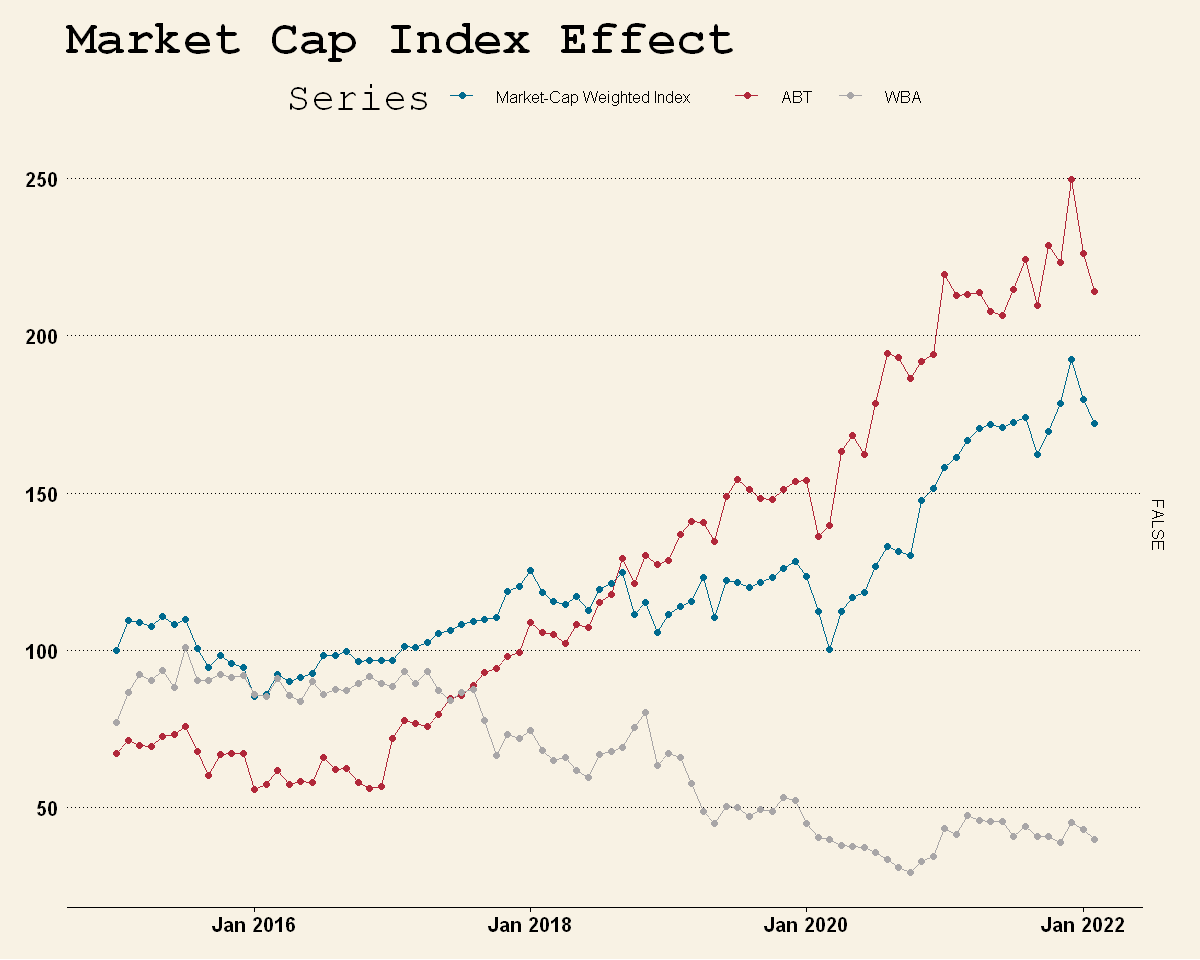

In [41]:
mc_index <- full_join(tk_tbl(index_2), tk_tbl(mc_list), by = "index" )
mc_index1 <- xts(mc_index[,c(2,3,13)],mc_index$index)
tail(mc_index1)

#compare the effect to index with ABT(Highest Mark Cap) and WBA(normal stock) 
options(repr.plot.width = 10, repr.plot.height = 8)
autoplot(mc_index1, facets = FALSE) + geom_line() + geom_point() + 
    theme_wsj()+ scale_colour_wsj("dem_rep")+ ggtitle("Market Cap Index Effect")

**Comments:  
In Market-Capitalization Weighting Index, the weight on each constituent security is determined by dividing its market capitalization by the total market capitalization of all the securities in the index.As we can see in the "Stock Index Comparation"plot, the market capitalization weighted index has lower value than the price weighted index.One reason is that unlike the price wighted index that gives more weight to  "ZBRA"and "LRCX", the market capitalization weighted index gives more weight to "QCMO" and "ABT", which have relative high market capitalization values among the 20 stocks.**

**In Equal Weighting Index, an equal weight is assigned to each constituent stock. Unlike a price weighted index, where the weights are arbitrarily determined by the market prices, the weights in an equally weighted index are arbitrarily assigned by the index provider. However, such weighting method have two main disadvantages. Firstly, stocks that constitute the largest fraction of the target market value are underepresented, and stocks that constitute a small fraction of the target market are overrepresented. Secondly, after the index is constructed and the prices of constituent securities change, the index is no longer equally weighted. The equal weighting method and its disadvantages mentioned above may expalin the discrepancy between equally weighted index and the other two, as we can find in the index plot.**